In [1]:
!pip install numpy pandas scikit-learn matplotlib joblib keras tensorflow

In [2]:
import os
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential,load_model
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [3]:
dictionary = "data_vnstock/"
df_top50 = pd.read_json("top50_tickers.json")

# Lấy danh sách ticker
all_tickers = df_top50['ticker'].tolist()
print(all_tickers)

['MZG', 'TLD', 'HAH', 'HVN', 'L40', 'CRC', 'LPB', 'GEE', 'VAB', 'KLB', 'NAF', 'STB', 'NRC', 'MBB', 'SMC', 'KHG', 'HAG', 'ABB', 'PPT', 'DC4', 'TCB', 'TAL', 'KDH', 'LSG', 'DDV', 'HDB', 'TC6', 'NTP', 'HHS', 'VEC', 'DSE', 'BMS', 'ACB', 'VHE', 'JVC', 'MBS', 'AAS', 'IJC', 'TV2', 'CTG', 'VFS', 'EIB', 'BIC', 'HPG', 'TCH', 'DPM', 'DL1', 'MSR', 'PAN', 'BFC']


In [4]:
def data_train(scaled_data,training_data_len, horizon = 60):
    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []
    for i in range(horizon, len(train_data)):
        x_train.append(train_data[i-horizon:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    return x_train,y_train
        
def data_test(dataset,scaled_data,training_data_len, horizon = 60):
    test_data = scaled_data[training_data_len - horizon:, :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(horizon, len(test_data)):
        x_test.append(test_data[i-horizon:i, 0])
        
    x_test, y_test = np.array(x_test), np.array(y_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
    return x_test,y_test


    

In [5]:
def data_split_train(dataset):
    training_data_len = int(np.ceil(len(dataset) * .95 ))
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    x_train,y_train = data_train(scaled_data, training_data_len)
    x_test,y_test = data_test(dataset,scaled_data, training_data_len)
    
    return  scaler,x_train,y_train, x_test,y_test




In [6]:
def model_lstm_train(ticker,x_train, y_train):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(x_train, y_train, batch_size=1, epochs=1)
    
    model.save(f"models1/{ticker}_lstm_model.h5")
    return model 



In [7]:

for t, ticker in enumerate(all_tickers):
    filePath = os.path.join(dictionary, f"{ticker}.csv")
    df = pd.read_csv(filePath, sep=',')
    data = df.filter(['close'])

    dataset = data.values
    print(dataset)
    scaler,x_train,y_train, x_test,y_test = data_split_train(dataset)
    model = model_lstm_train(ticker, x_train,y_train)
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    print(f"{ticker} - RMSE: {rmse:.2f}")

    

    

[[11.49]
 [11.3 ]
 [10.48]
 [10.53]
 [10.43]
 [10.34]
 [10.43]
 [10.43]
 [10.63]
 [10.43]
 [10.24]
 [10.43]
 [10.24]
 [10.24]
 [10.15]
 [10.05]
 [10.05]
 [ 9.76]
 [ 9.76]
 [ 9.66]
 [ 9.66]
 [ 9.57]
 [ 9.47]
 [ 9.47]
 [ 9.28]
 [ 8.7 ]
 [ 9.28]
 [ 8.7 ]
 [ 8.79]
 [ 8.6 ]
 [ 8.41]
 [ 8.31]
 [ 8.21]
 [ 8.21]
 [ 8.12]
 [ 8.02]
 [ 7.63]
 [ 7.15]
 [ 6.96]
 [ 7.15]
 [ 7.34]
 [ 7.25]
 [ 6.96]
 [ 6.86]
 [ 6.76]
 [ 6.76]
 [ 6.76]
 [ 6.47]
 [ 6.47]
 [ 6.47]
 [ 6.28]
 [ 6.67]
 [ 5.8 ]
 [ 6.18]
 [ 6.47]
 [ 6.38]
 [ 6.47]
 [ 6.09]
 [ 6.47]
 [ 6.18]
 [ 6.18]
 [ 6.76]
 [ 7.44]
 [ 8.5 ]
 [ 8.7 ]
 [ 8.12]
 [ 7.73]
 [ 7.73]
 [ 7.34]
 [ 7.34]
 [ 7.15]
 [ 7.34]
 [ 7.25]
 [ 7.15]
 [ 6.96]
 [ 7.05]
 [ 7.05]
 [ 6.96]
 [ 7.25]
 [ 7.15]
 [ 7.05]
 [ 7.15]
 [ 7.15]
 [ 7.05]
 [ 7.15]
 [ 7.15]
 [ 7.92]
 [ 7.63]
 [ 7.34]
 [ 7.25]
 [ 7.25]
 [ 7.34]
 [ 7.25]
 [ 7.25]
 [ 7.44]
 [ 7.44]
 [ 6.76]
 [ 7.05]
 [ 6.28]
 [ 6.47]
 [ 7.05]
 [ 6.96]
 [ 6.76]
 [ 6.57]
 [ 6.67]
 [ 6.57]
 [ 6.76]
 [ 6.76]
 [ 6.57]
 [ 6.76]
 [ 6.67]
 

e:\Stock Project\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0380


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
MZG - RMSE: 0.66
[[11.41]
 [12.21]
 [12.52]
 ...
 [ 8.22]
 [ 8.23]
 [ 8.24]]


e:\Stock Project\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

MZG - Giá close gần nhất: 13.20
MZG - 30 giá close dự đoán tiếp theo: 14.401542663574219


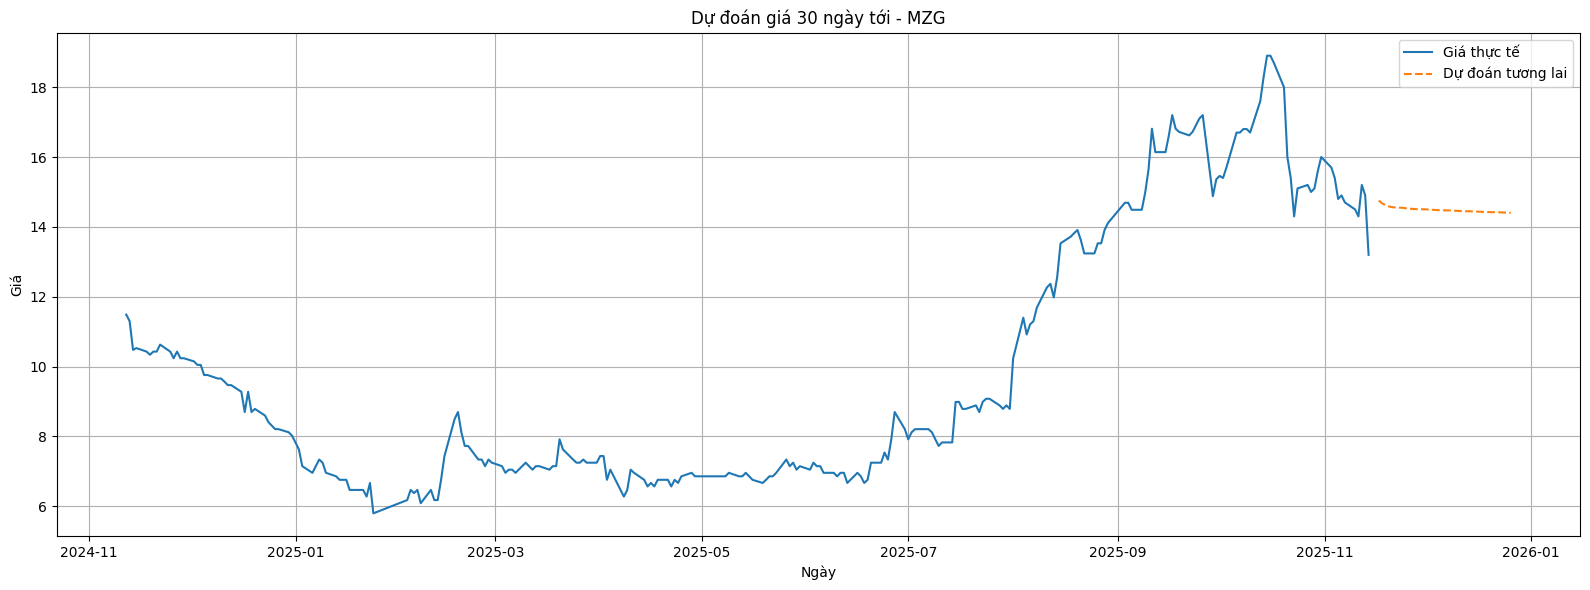

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


TLD - Giá close gần nhất: 8.24
TLD - 30 giá close dự đoán tiếp theo: 6.486076354980469


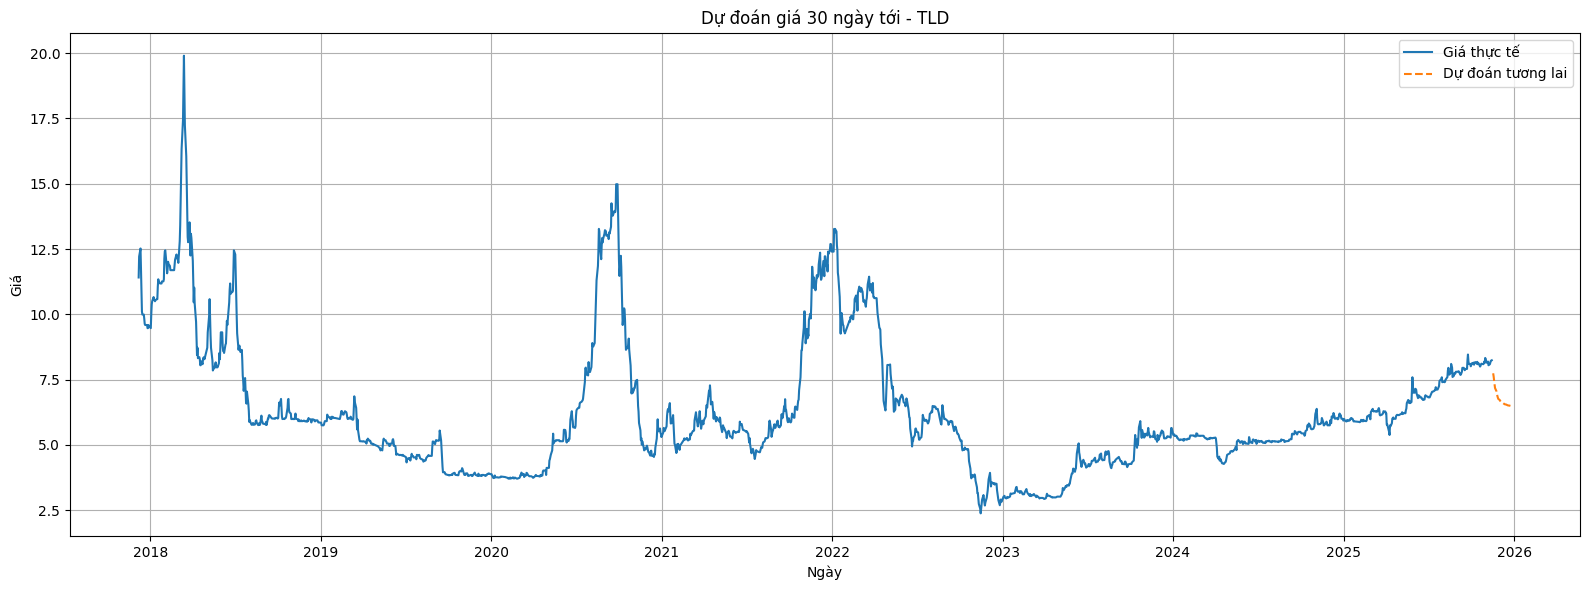

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


HAH - Giá close gần nhất: 65.00
HAH - 30 giá close dự đoán tiếp theo: 61.345096588134766


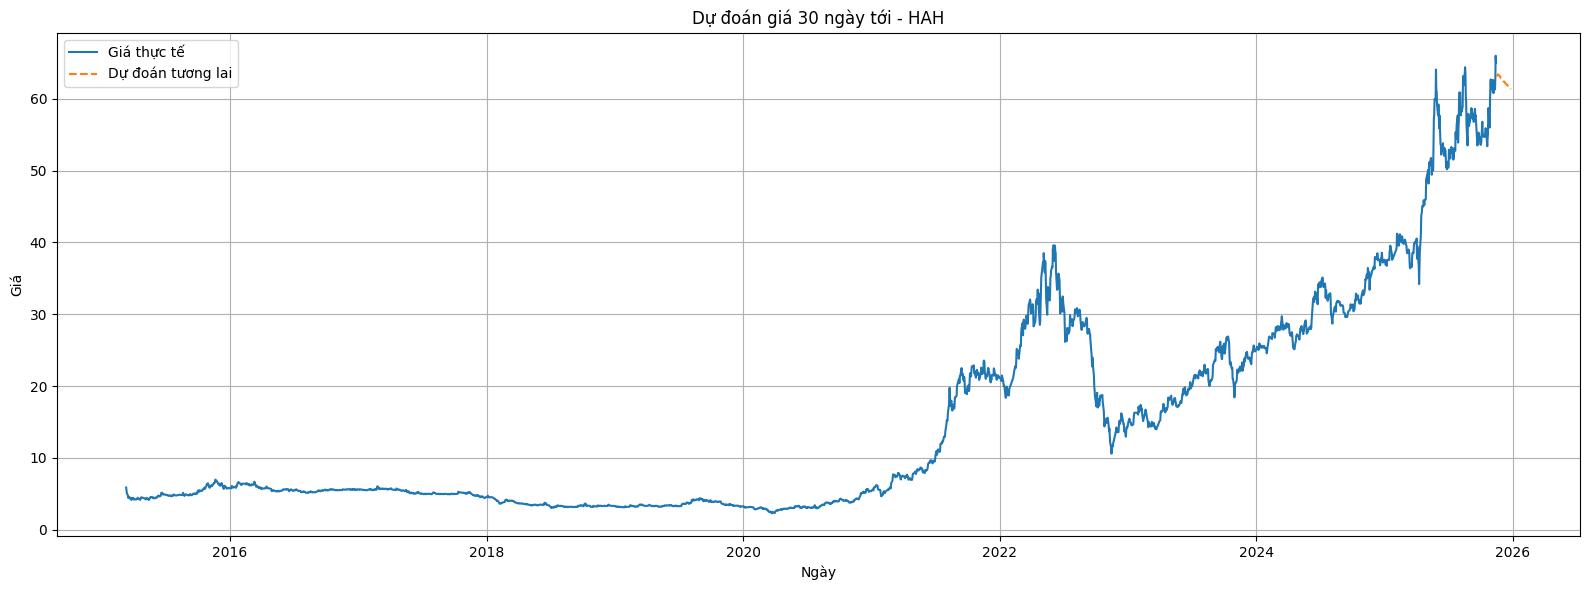

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


HVN - Giá close gần nhất: 29.20
HVN - 30 giá close dự đoán tiếp theo: 20.036447525024414


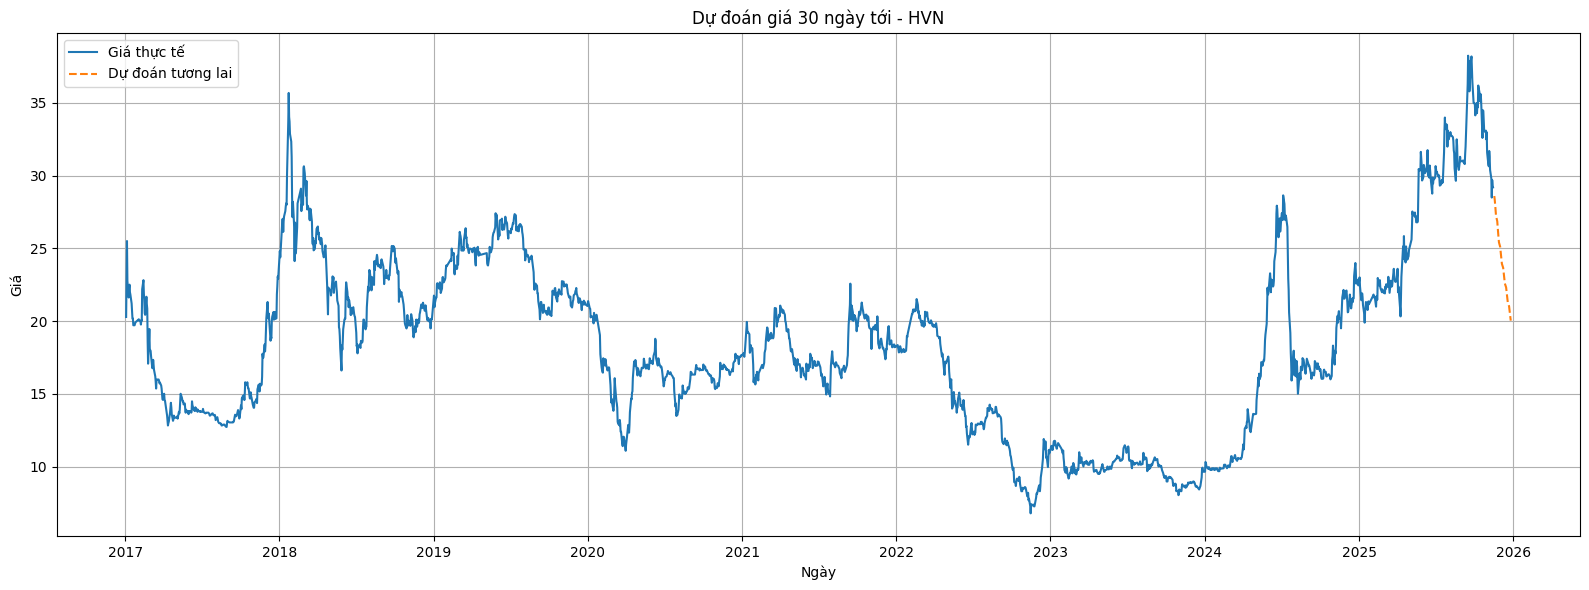

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


L40 - Giá close gần nhất: 91.00
L40 - 30 giá close dự đoán tiếp theo: 108.82512664794922


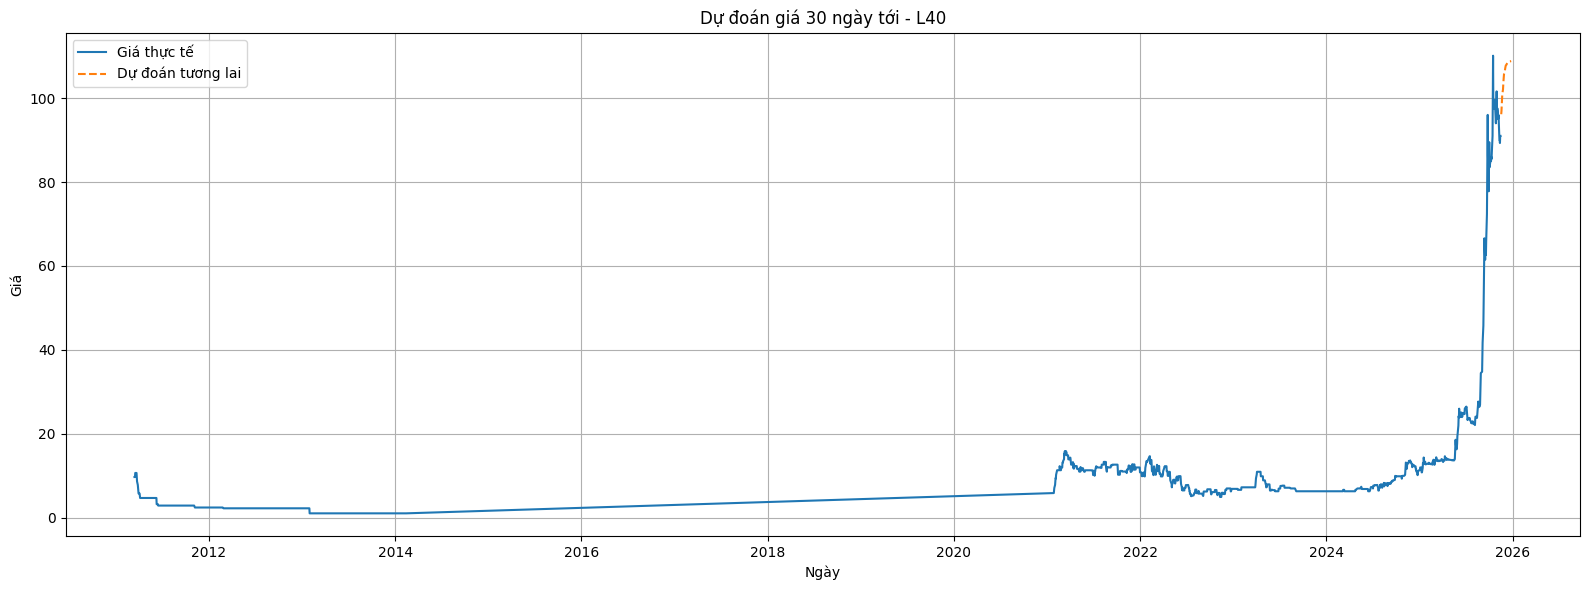

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


CRC - Giá close gần nhất: 9.09
CRC - 30 giá close dự đoán tiếp theo: 5.920637130737305


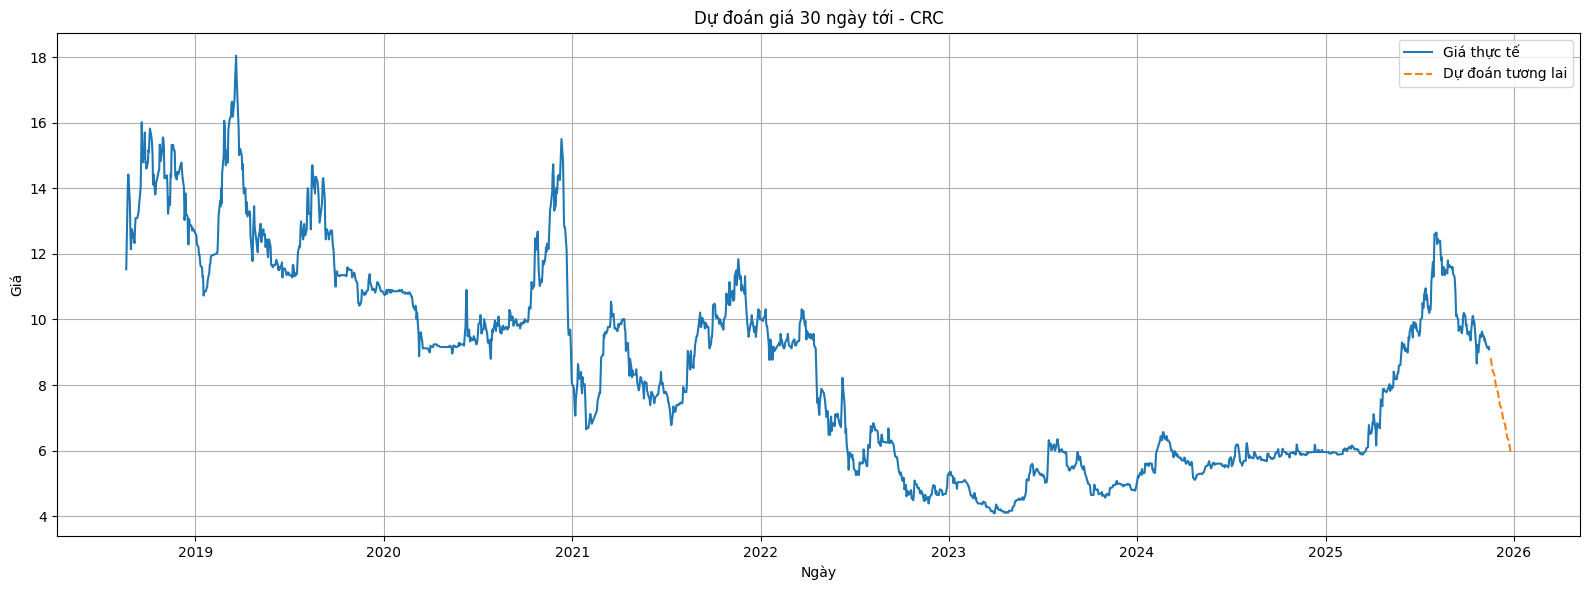

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


LPB - Giá close gần nhất: 49.90
LPB - 30 giá close dự đoán tiếp theo: 30.951845169067383


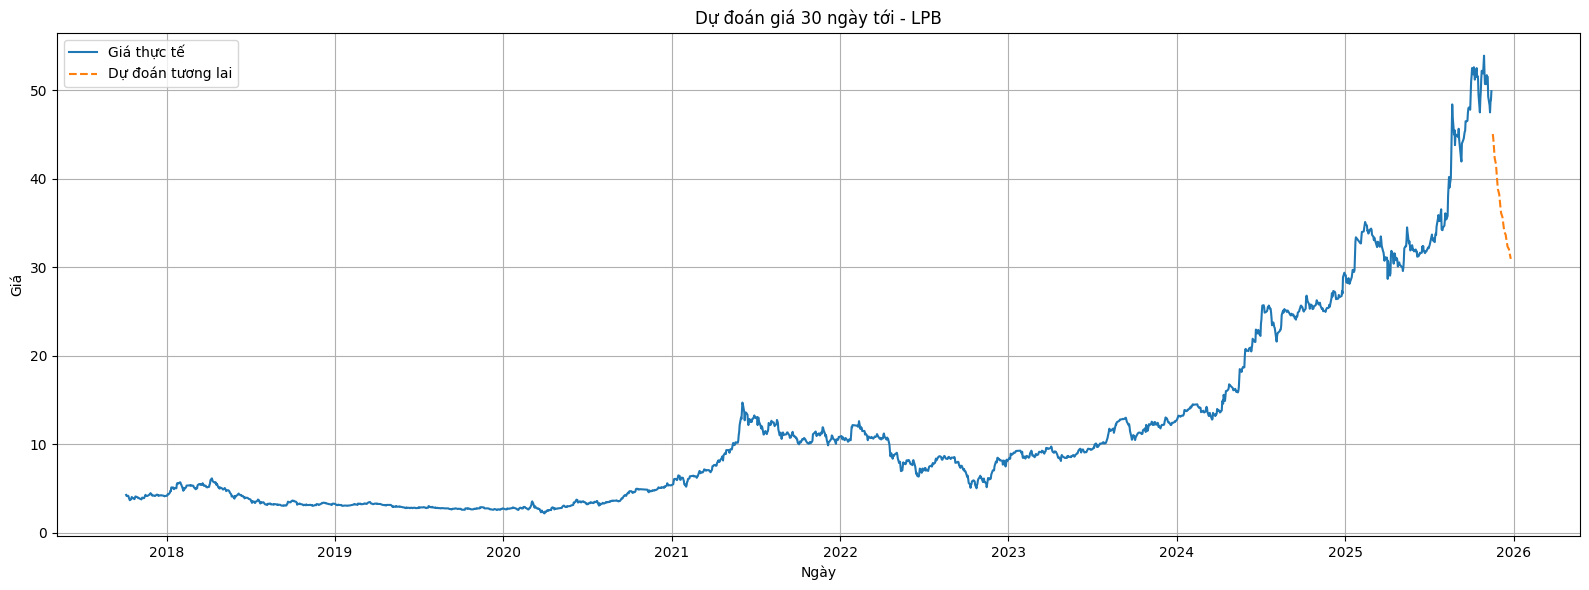

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


GEE - Giá close gần nhất: 174.00
GEE - 30 giá close dự đoán tiếp theo: 117.44026184082031


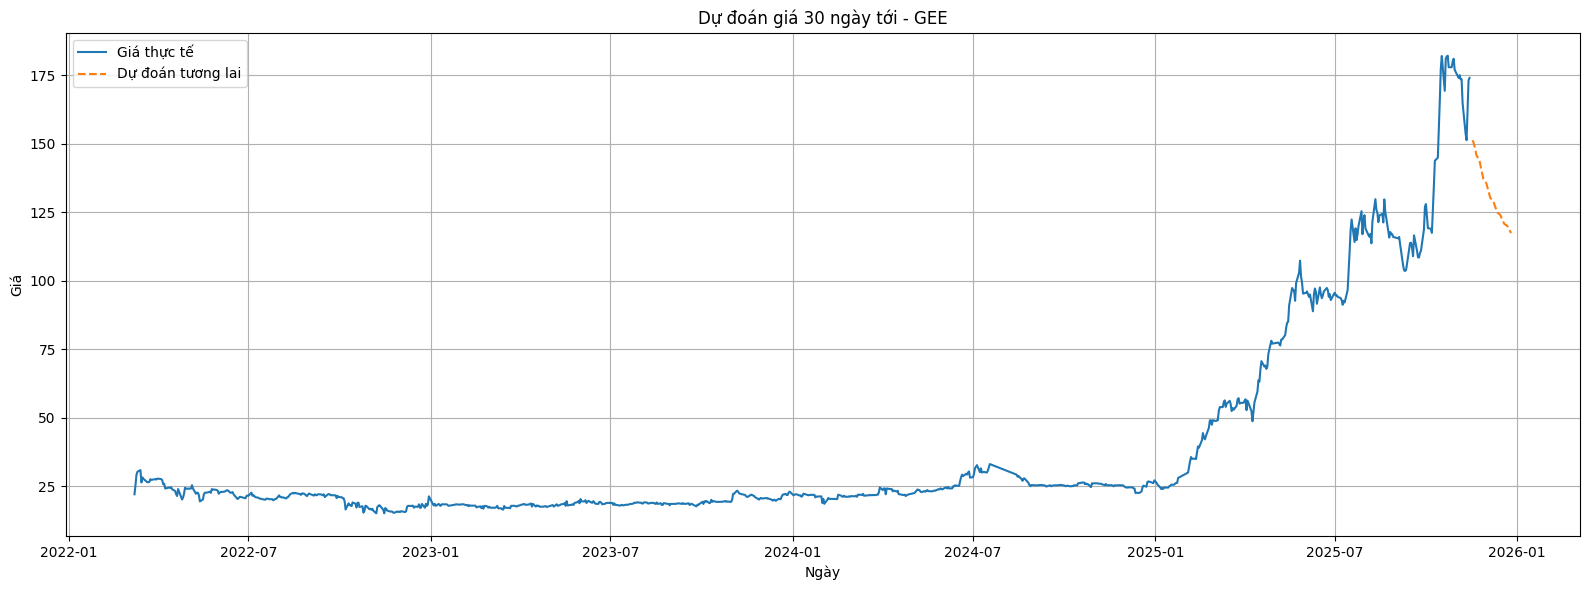

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


VAB - Giá close gần nhất: 10.95
VAB - 30 giá close dự đoán tiếp theo: 7.039546489715576


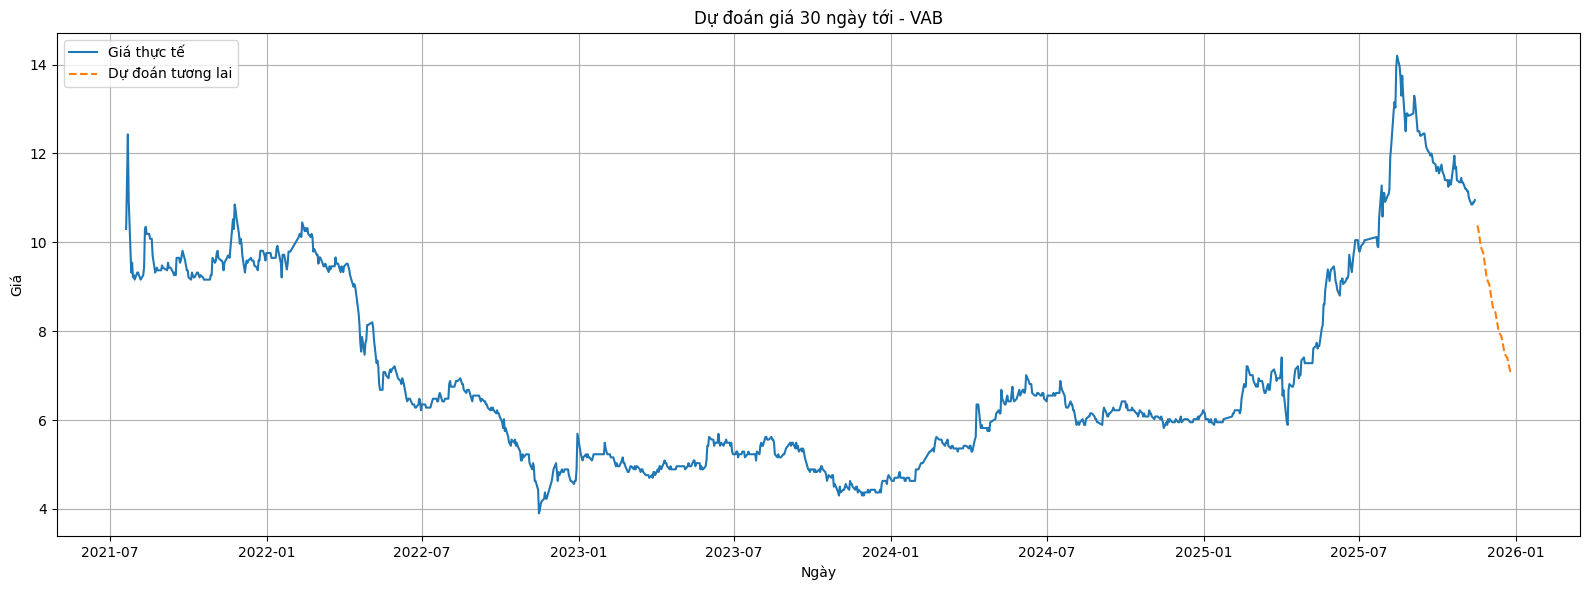

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


KLB - Giá close gần nhất: 15.50
KLB - 30 giá close dự đoán tiếp theo: 29.066457748413086


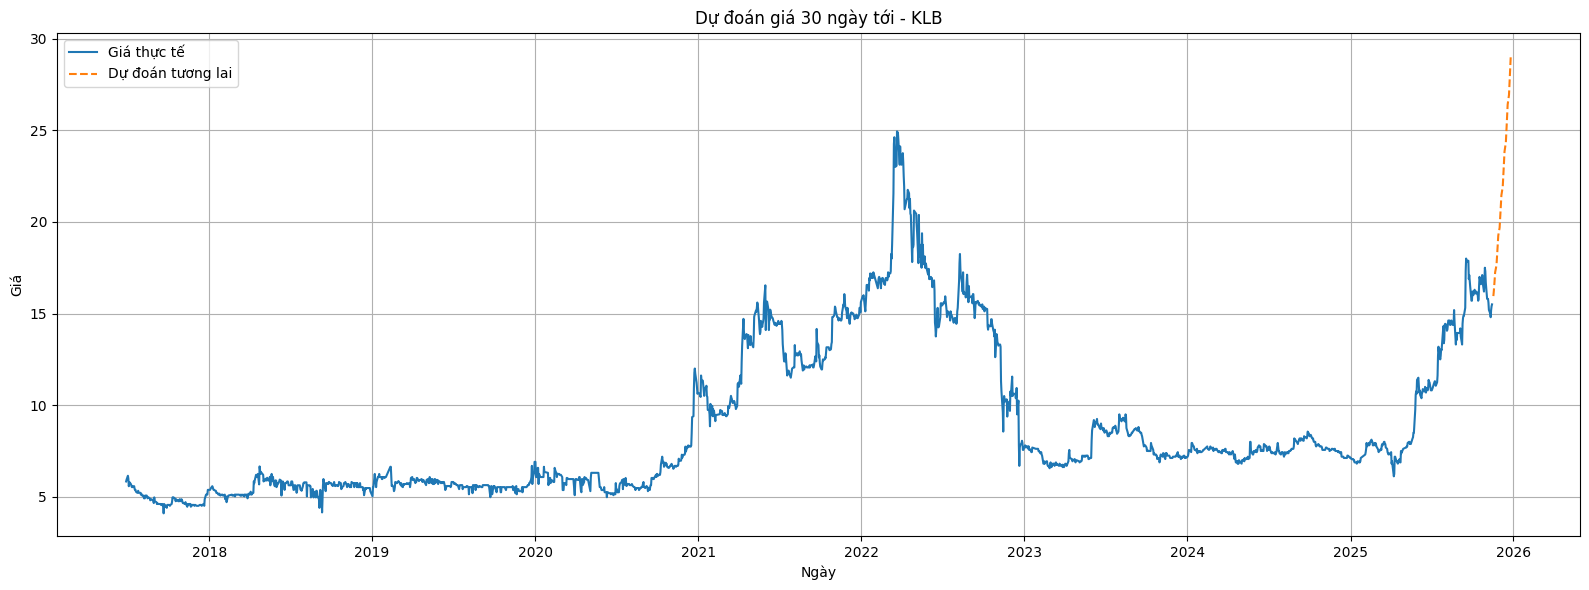

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


NAF - Giá close gần nhất: 33.85
NAF - 30 giá close dự đoán tiếp theo: 45.6540412902832


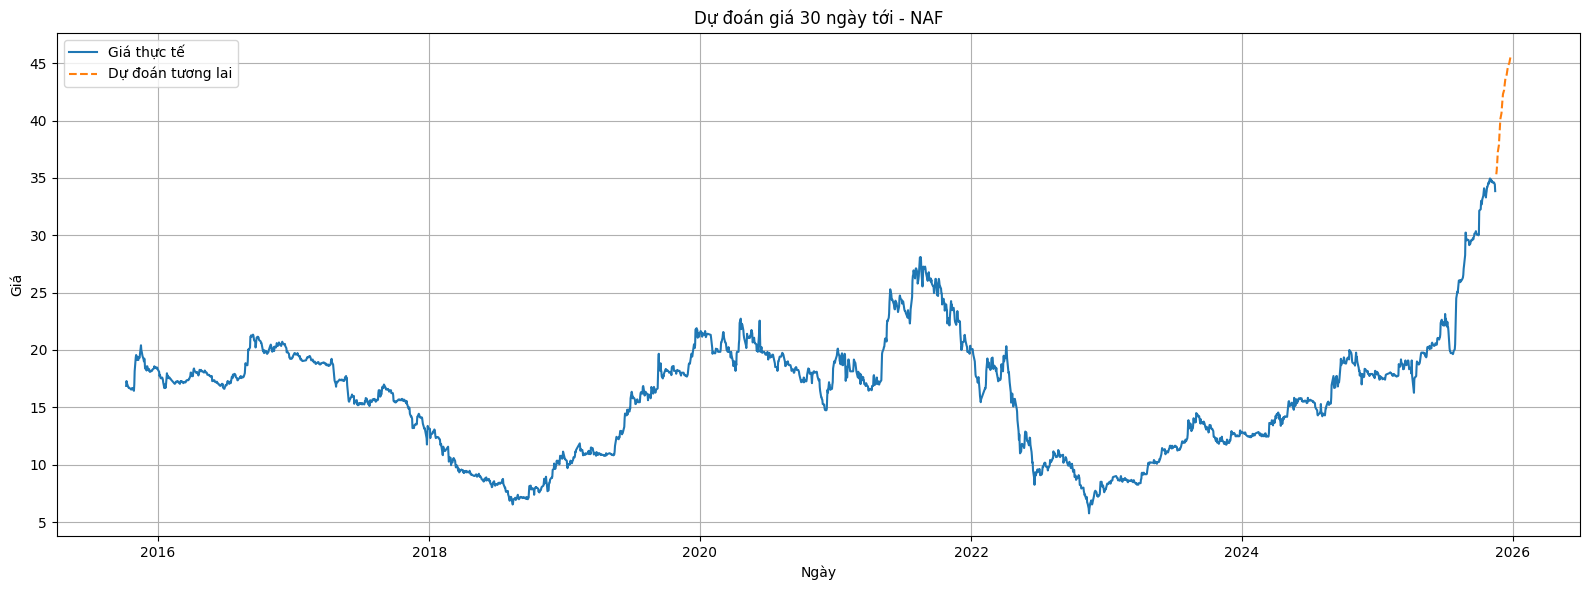

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


STB - Giá close gần nhất: 48.05
STB - 30 giá close dự đoán tiếp theo: 77.28263854980469


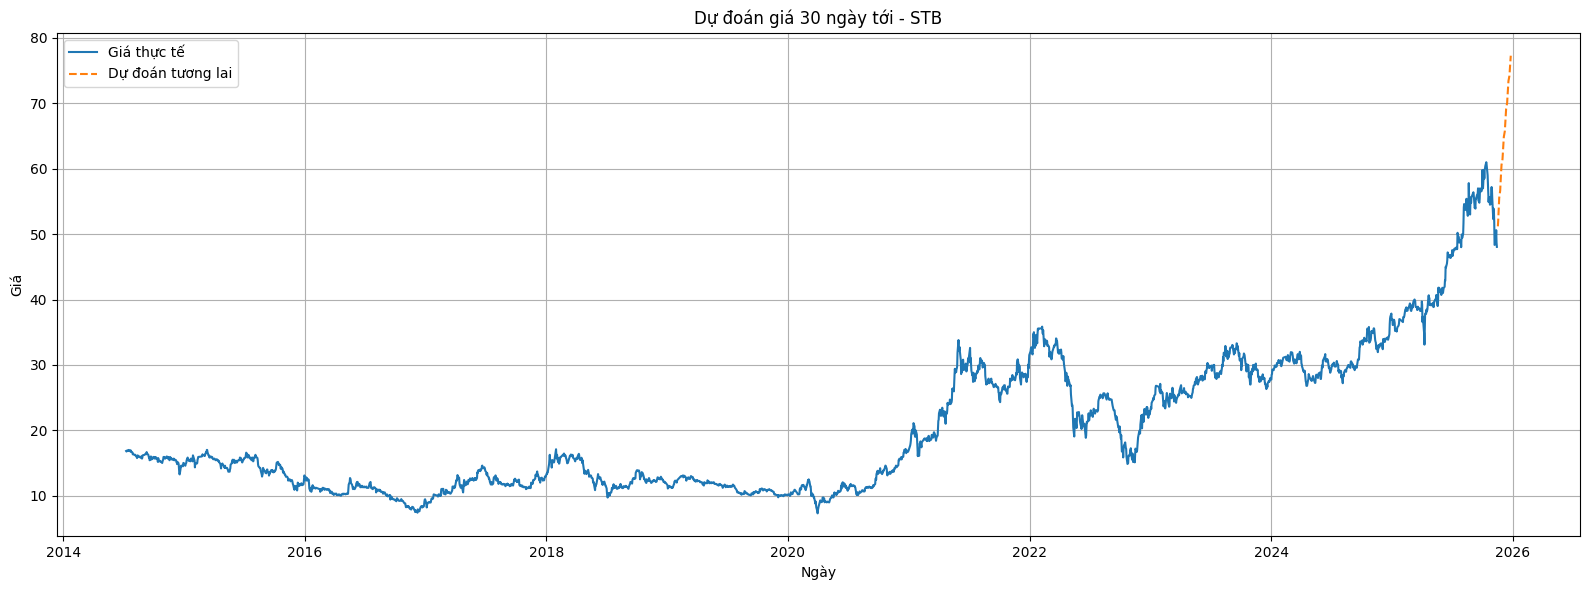

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


NRC - Giá close gần nhất: 6.40
NRC - 30 giá close dự đoán tiếp theo: 3.7974298000335693


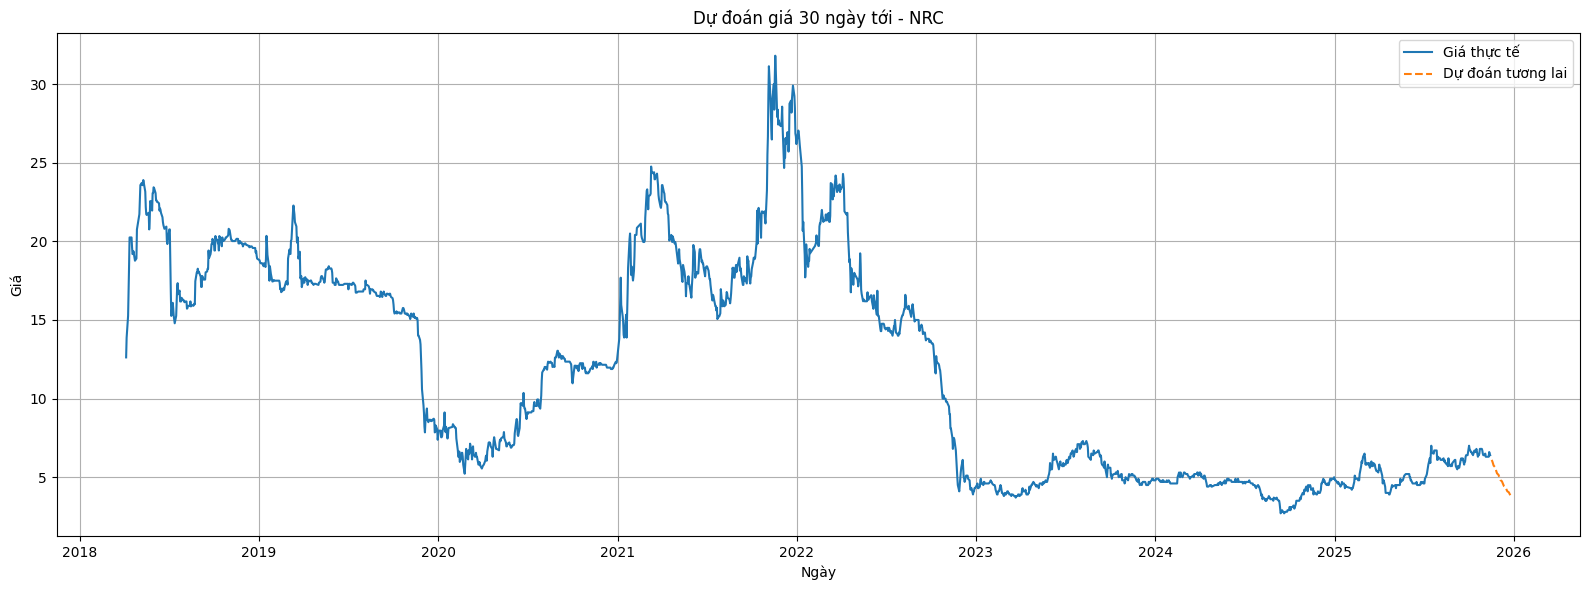

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


MBB - Giá close gần nhất: 23.50
MBB - 30 giá close dự đoán tiếp theo: 20.61941146850586


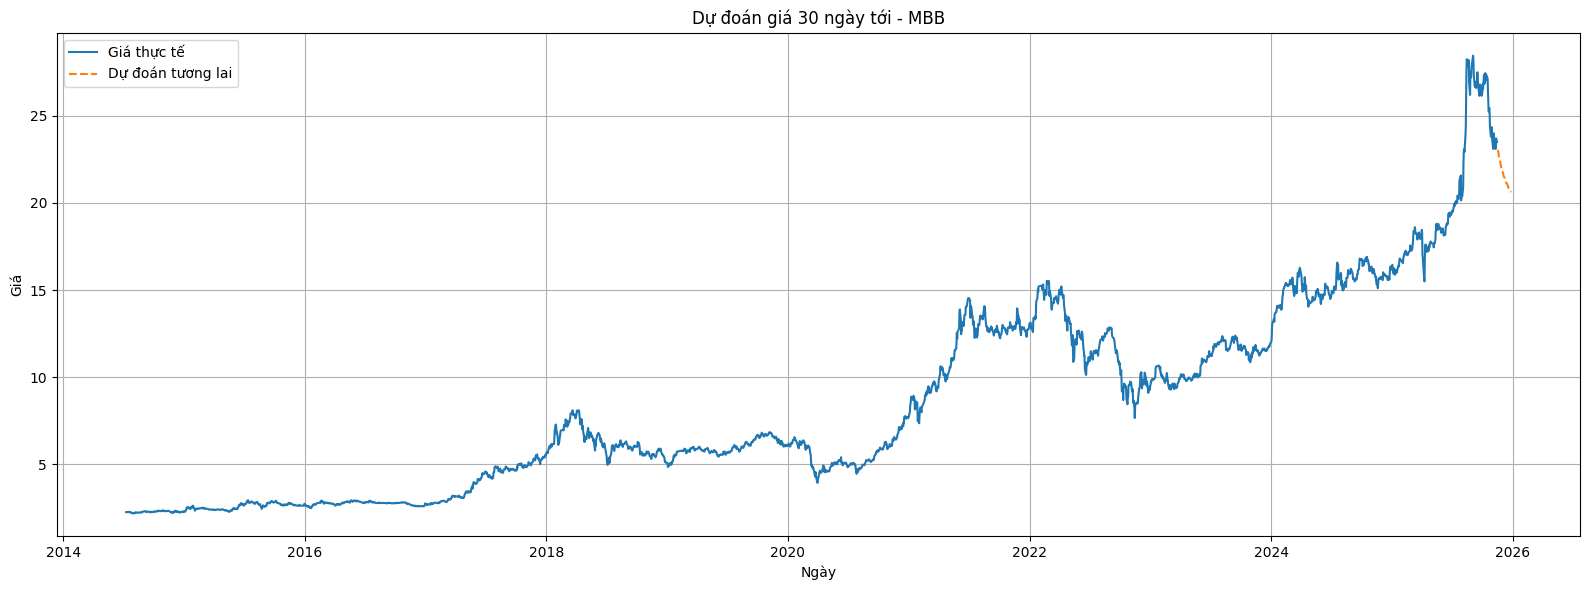

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


SMC - Giá close gần nhất: 13.25
SMC - 30 giá close dự đoán tiếp theo: 3.525561571121216


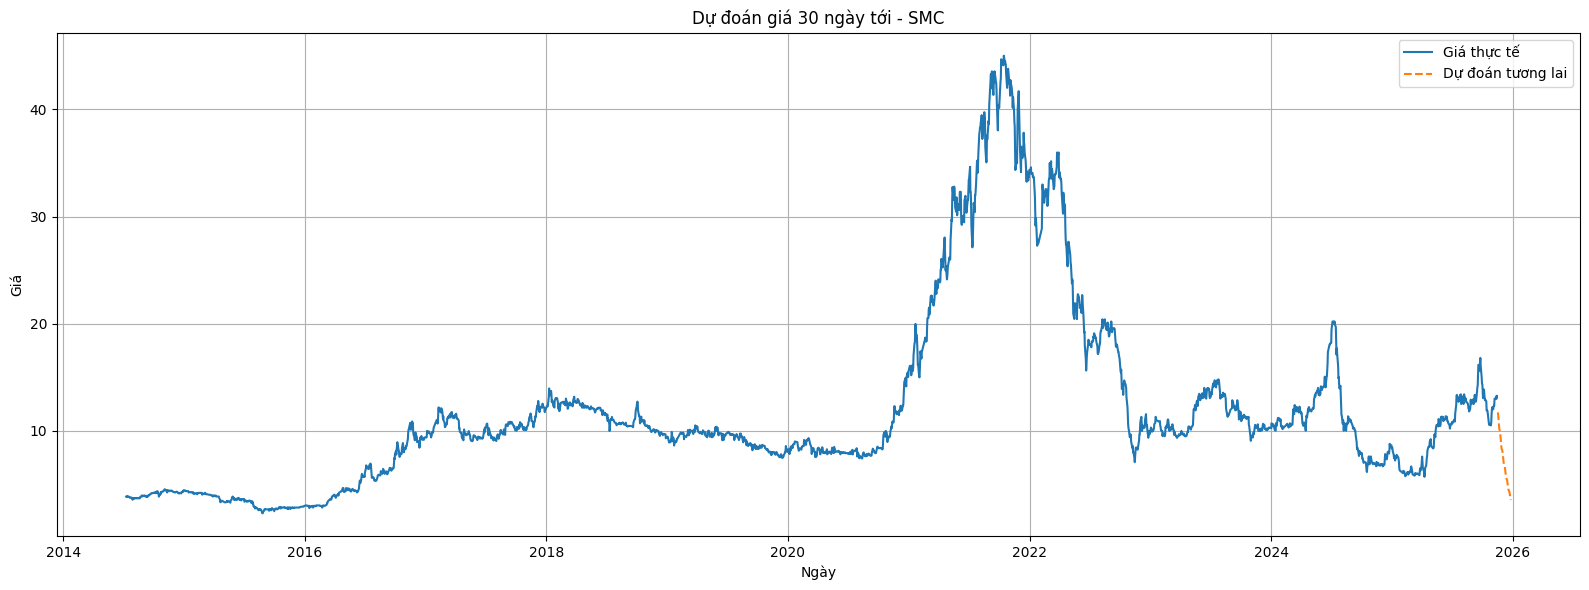

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


KHG - Giá close gần nhất: 7.60
KHG - 30 giá close dự đoán tiếp theo: 7.170847415924072


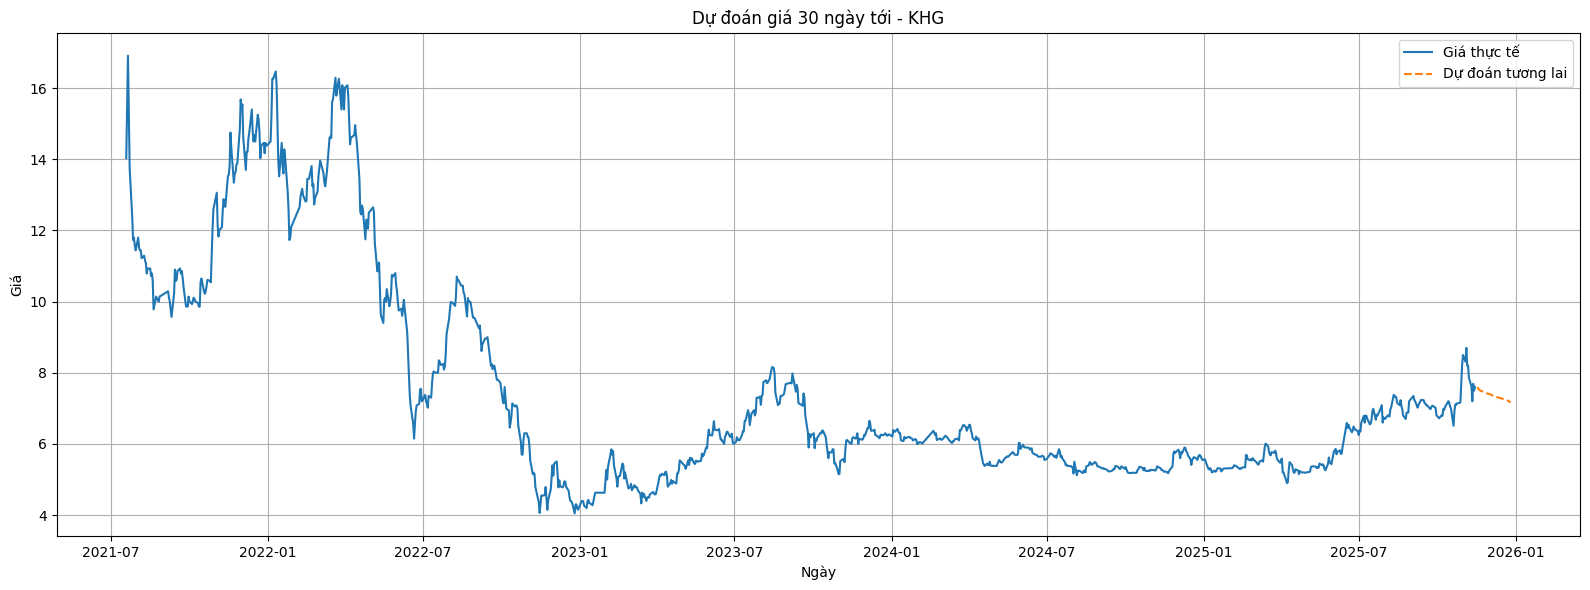

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


HAG - Giá close gần nhất: 17.65
HAG - 30 giá close dự đoán tiếp theo: 23.11837387084961


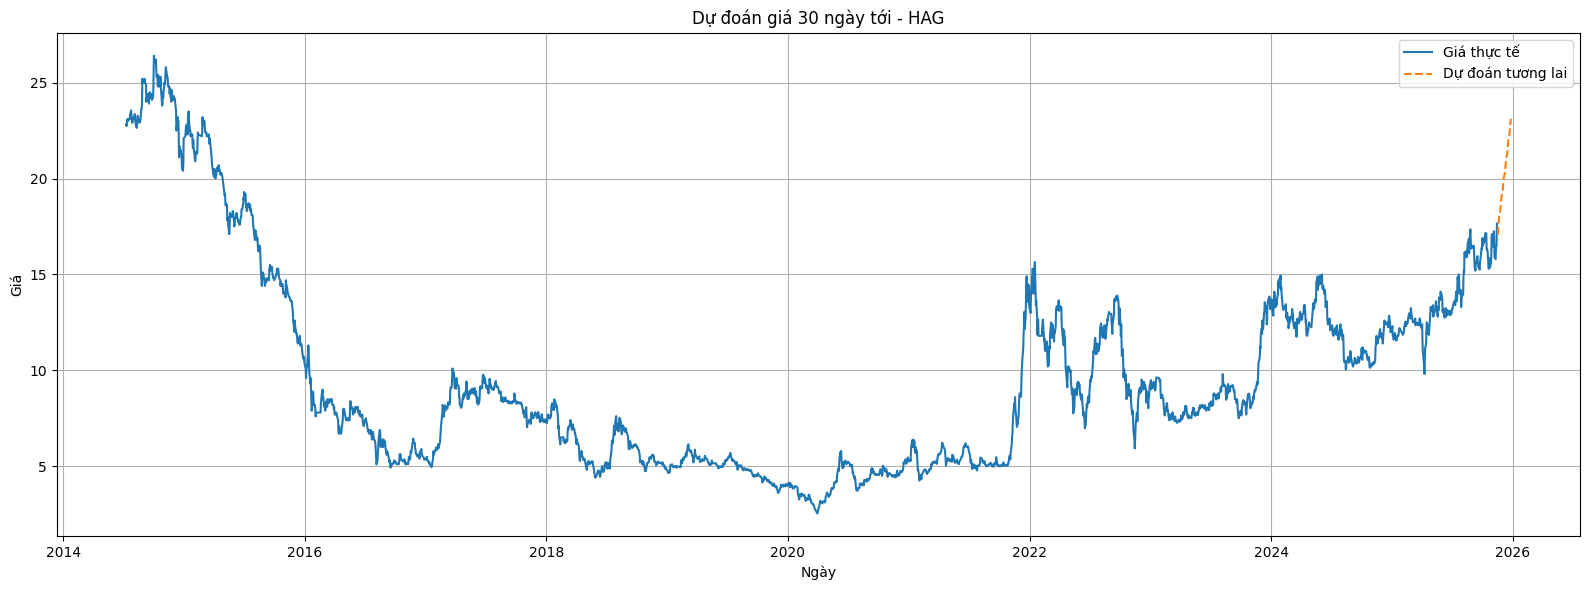

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


ABB - Giá close gần nhất: 13.90
ABB - 30 giá close dự đoán tiếp theo: 16.427663803100586


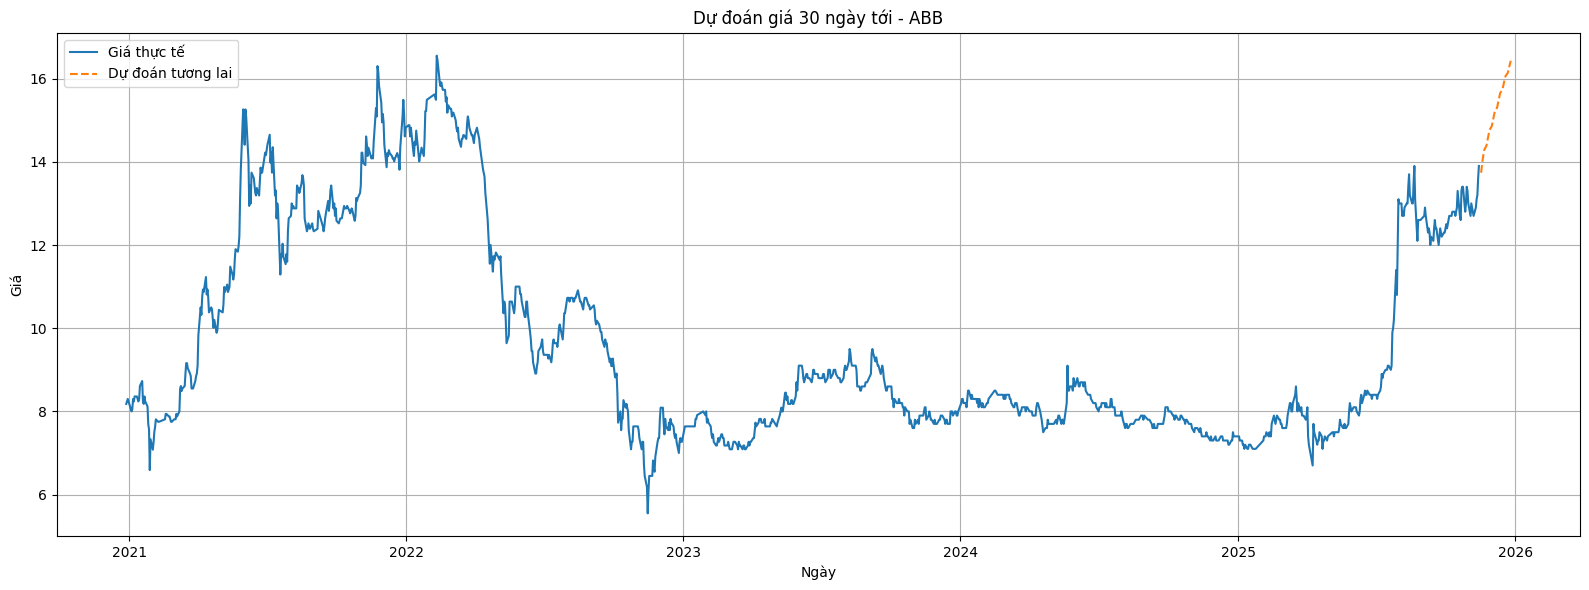

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


PPT - Giá close gần nhất: 15.20
PPT - 30 giá close dự đoán tiếp theo: 13.4234037399292


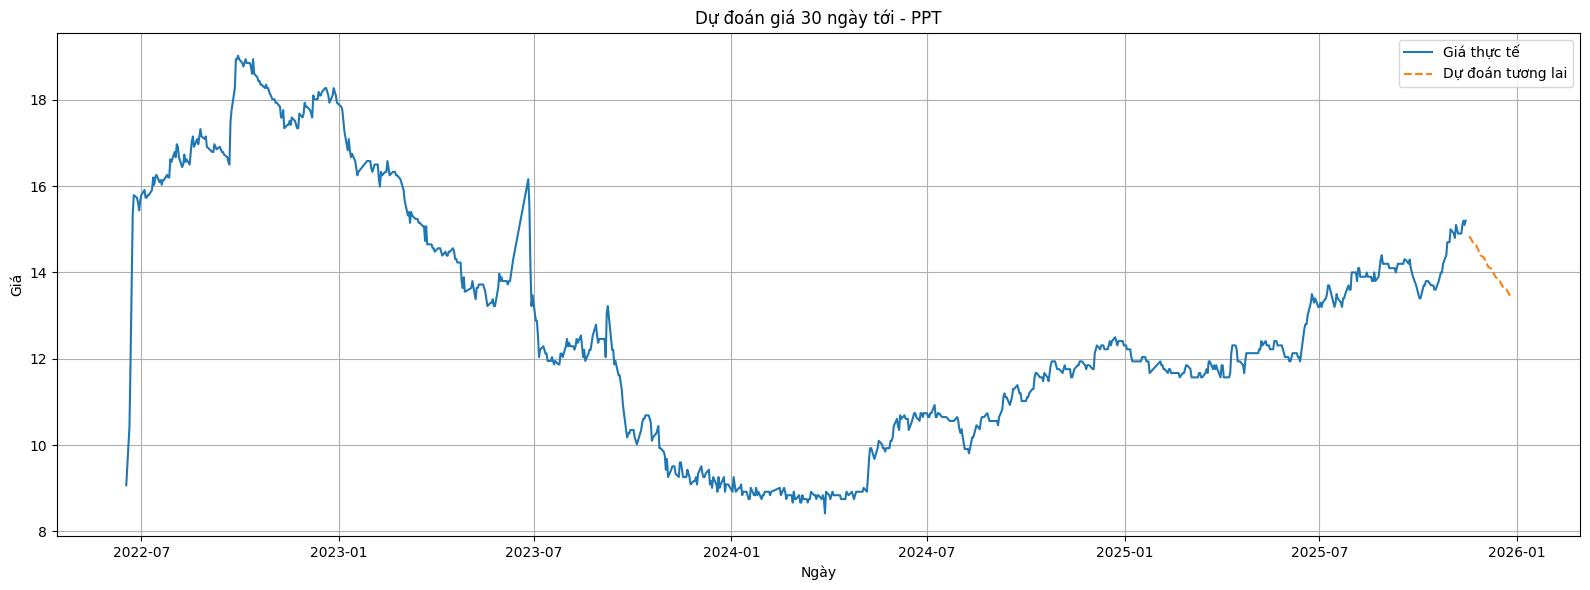

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


DC4 - Giá close gần nhất: 11.45
DC4 - 30 giá close dự đoán tiếp theo: 24.099851608276367


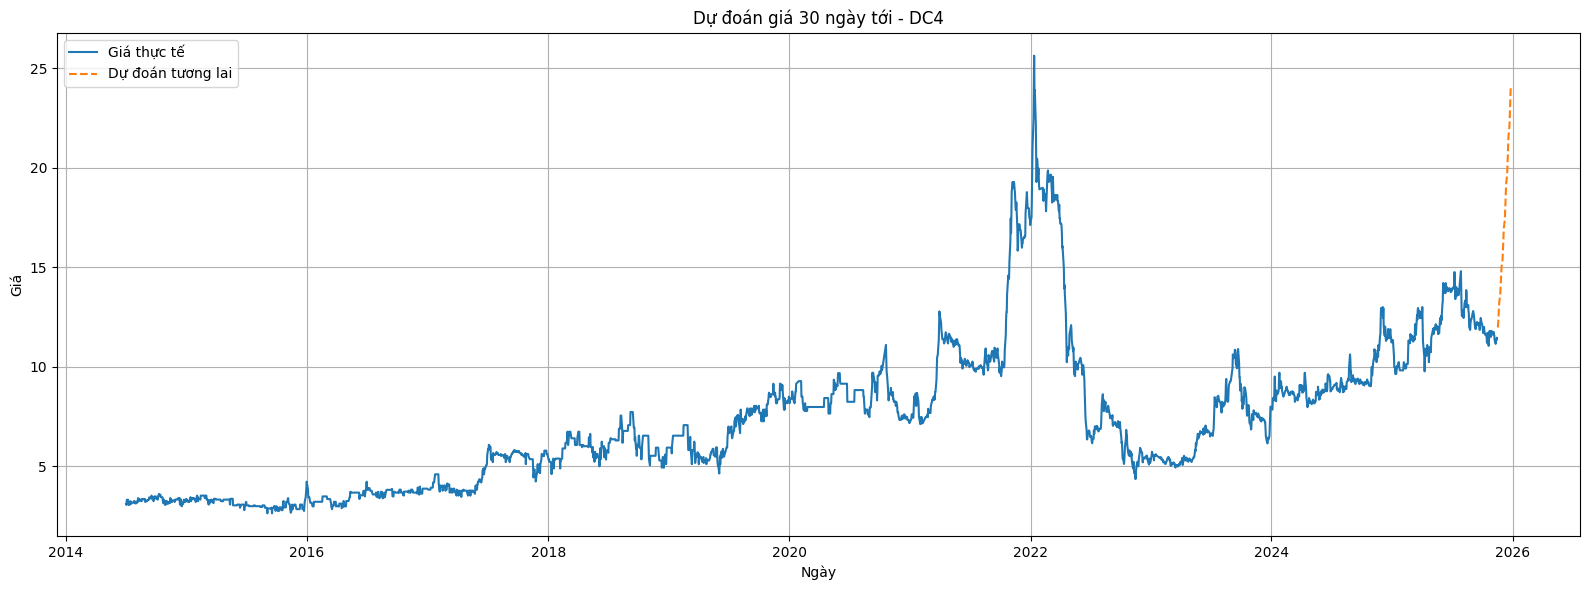

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


TCB - Giá close gần nhất: 35.10
TCB - 30 giá close dự đoán tiếp theo: 35.64387130737305


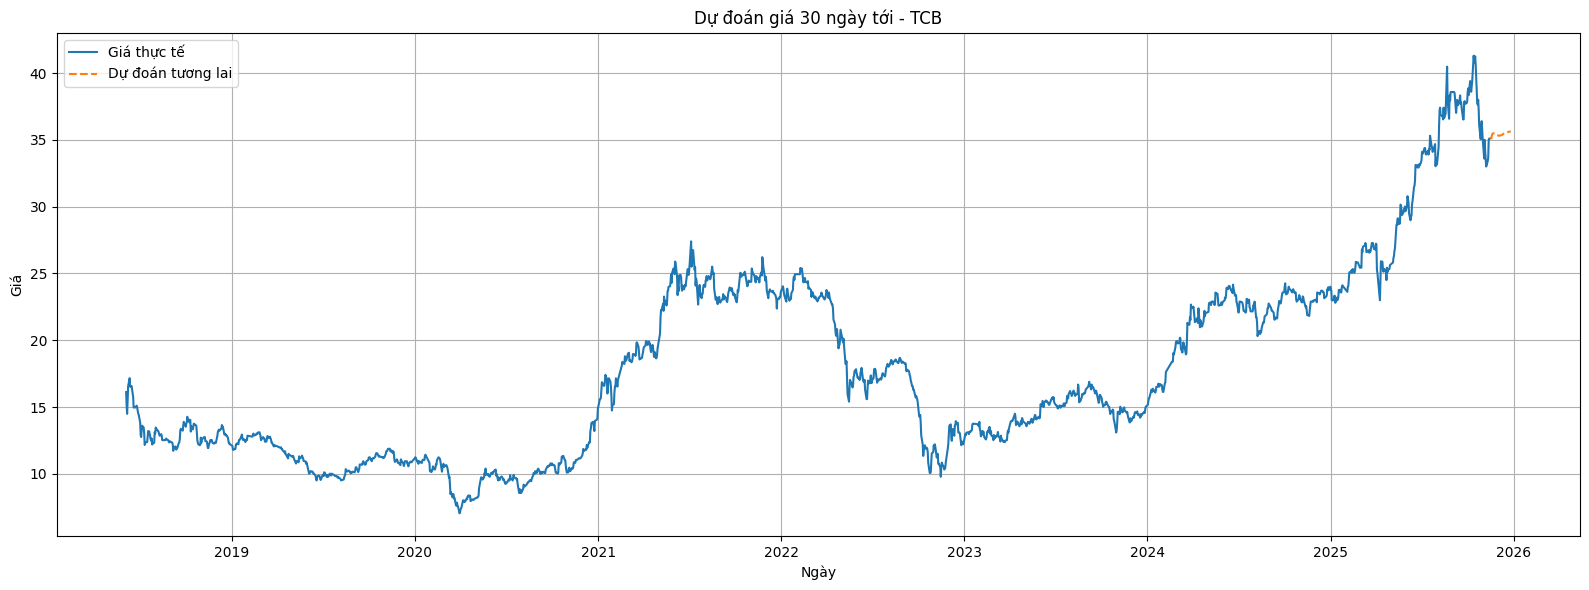

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


TAL - Giá close gần nhất: 45.00
TAL - 30 giá close dự đoán tiếp theo: 58.05146408081055


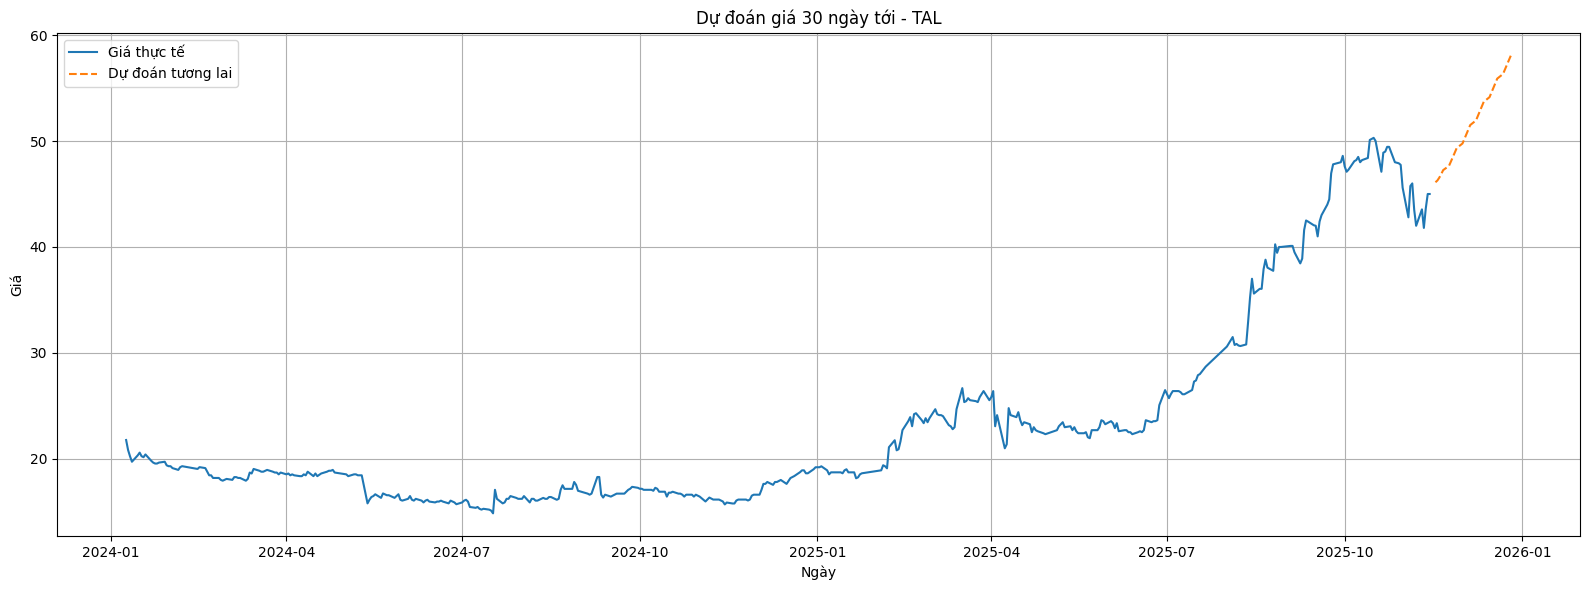

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


KDH - Giá close gần nhất: 34.65
KDH - 30 giá close dự đoán tiếp theo: 48.926429748535156


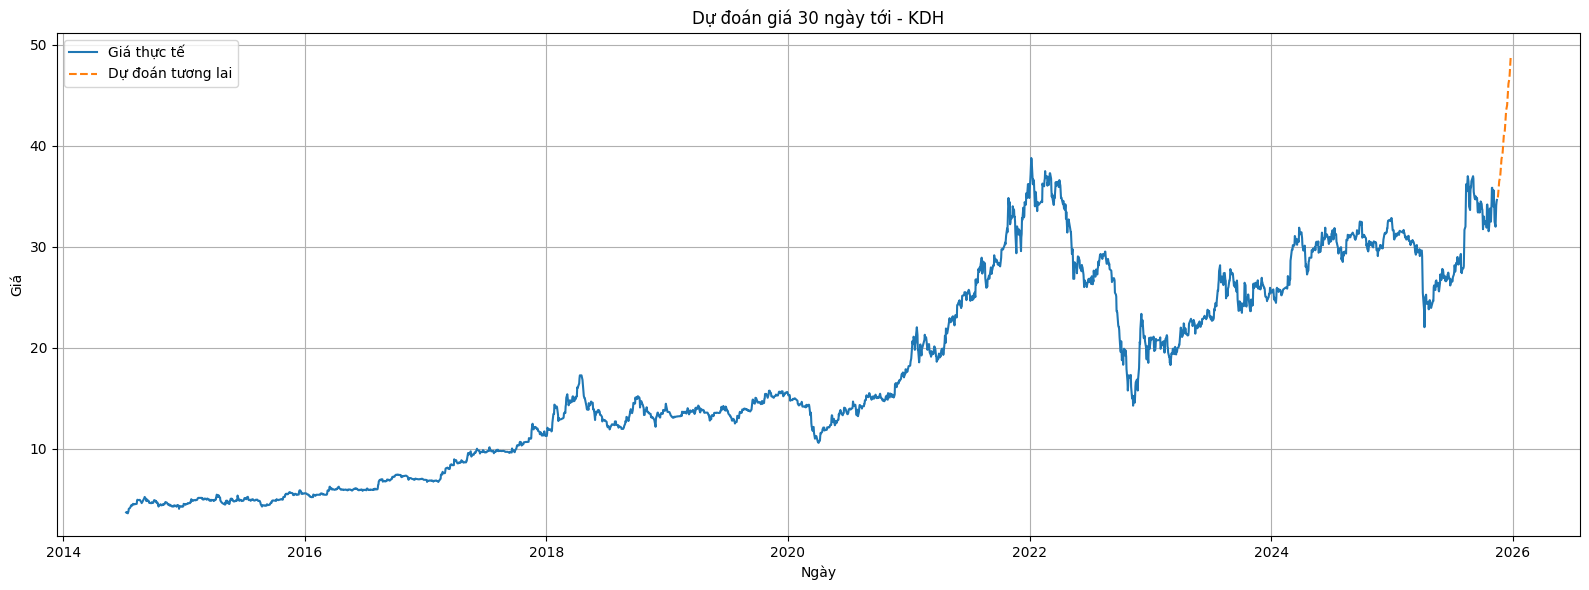

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


LSG - Giá close gần nhất: 32.30
LSG - 30 giá close dự đoán tiếp theo: 29.96805191040039


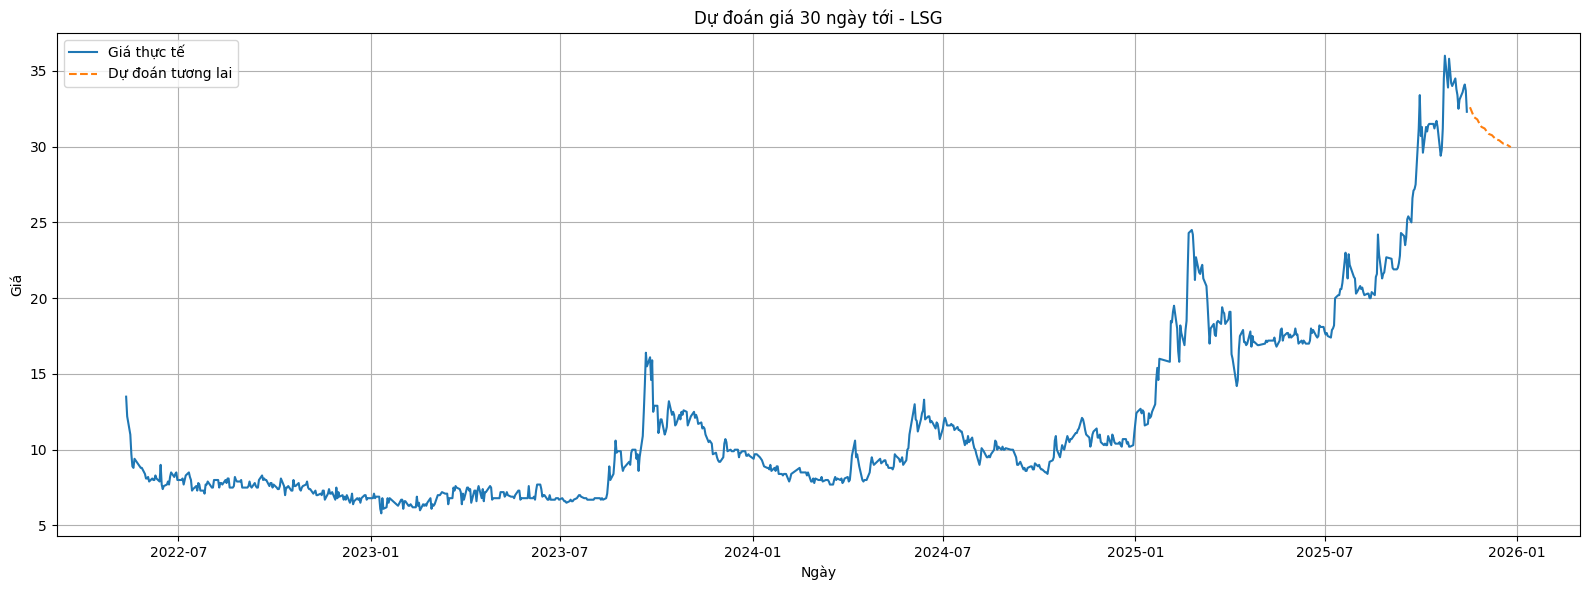

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


DDV - Giá close gần nhất: 29.50
DDV - 30 giá close dự đoán tiếp theo: 21.783428192138672


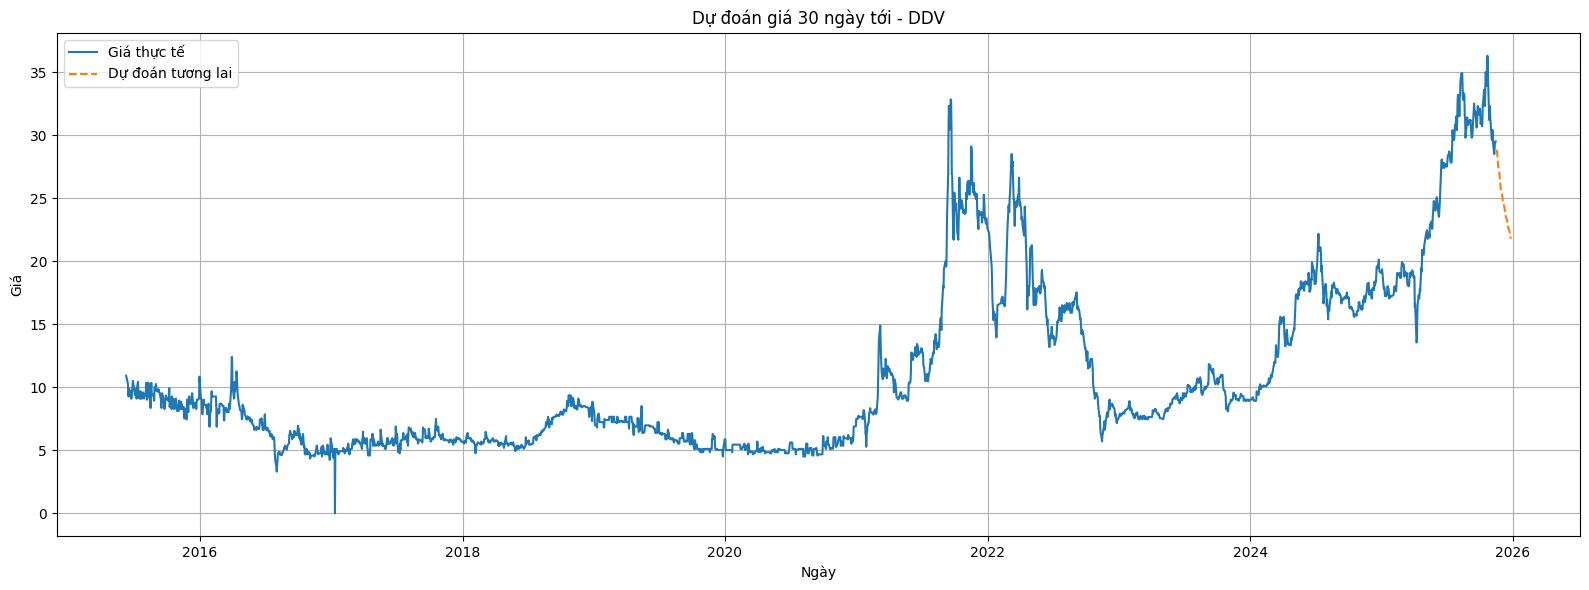

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


HDB - Giá close gần nhất: 29.85
HDB - 30 giá close dự đoán tiếp theo: 24.543704986572266


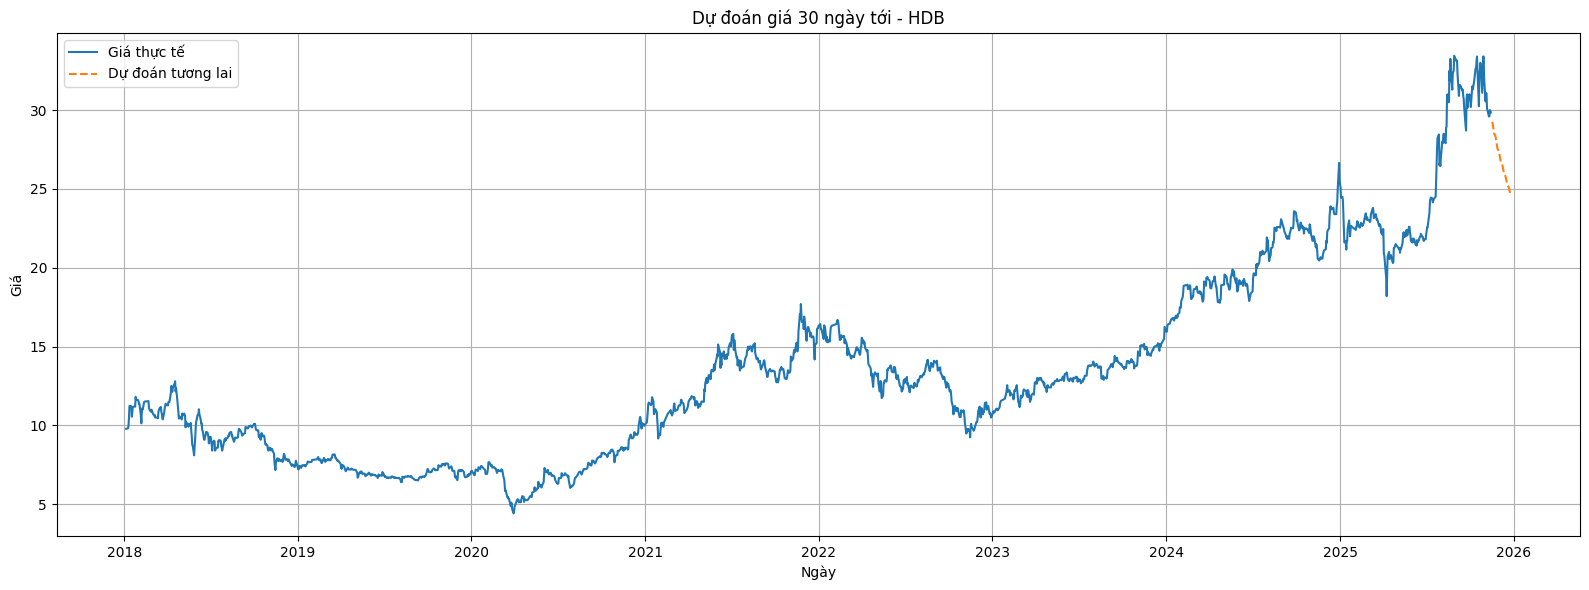

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


TC6 - Giá close gần nhất: 10.80
TC6 - 30 giá close dự đoán tiếp theo: 20.62216567993164


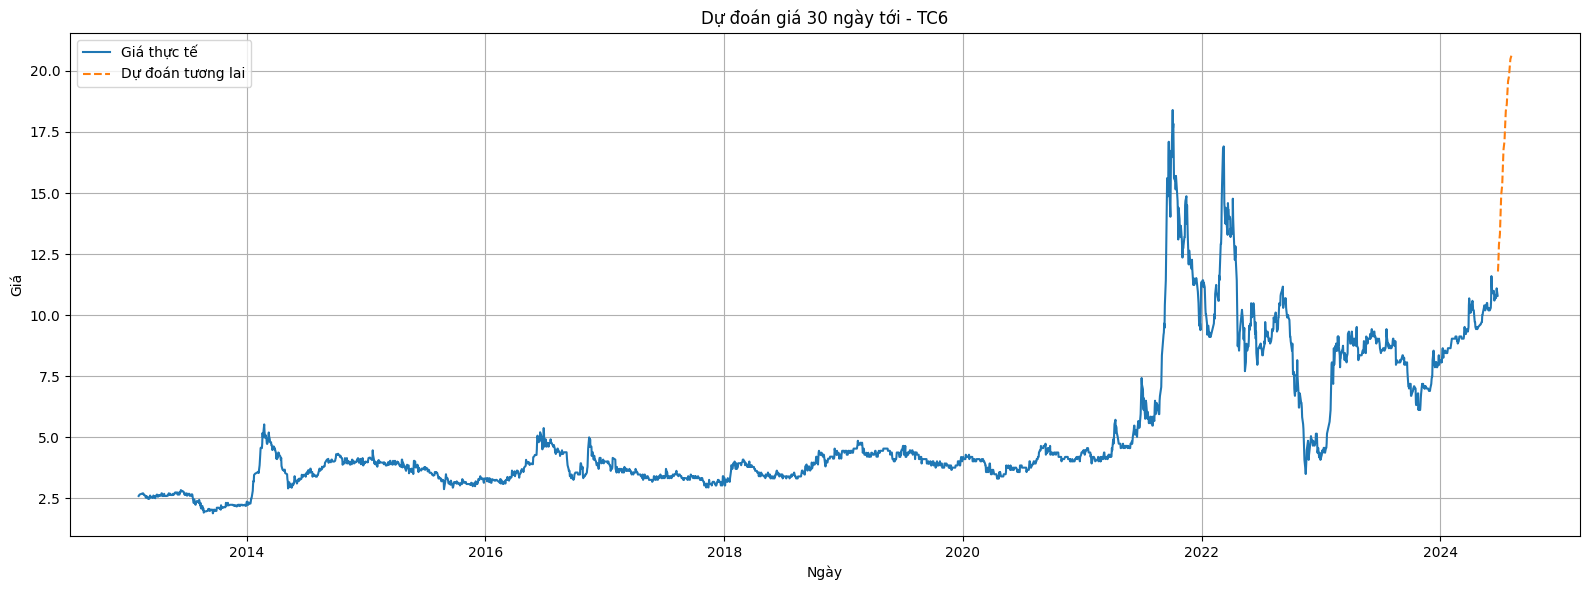

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


NTP - Giá close gần nhất: 63.80
NTP - 30 giá close dự đoán tiếp theo: 45.41484451293945


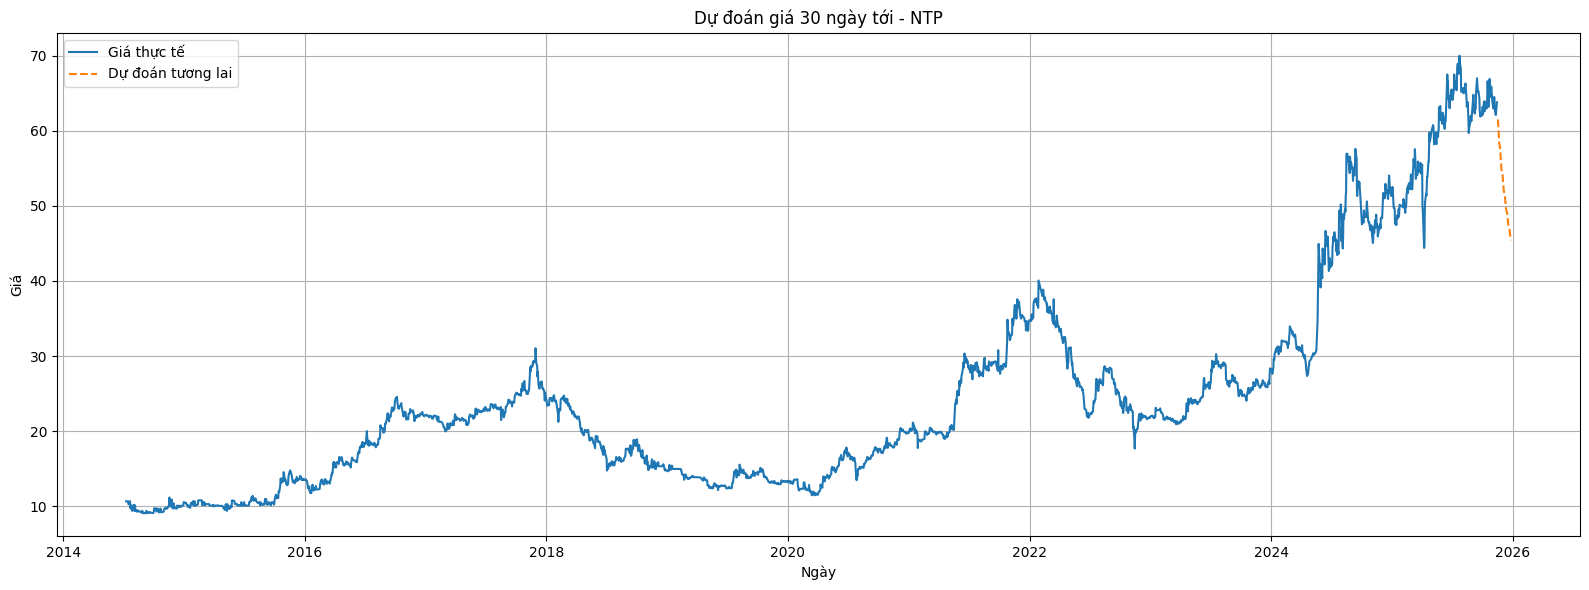

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


HHS - Giá close gần nhất: 14.80
HHS - 30 giá close dự đoán tiếp theo: 28.80242156982422


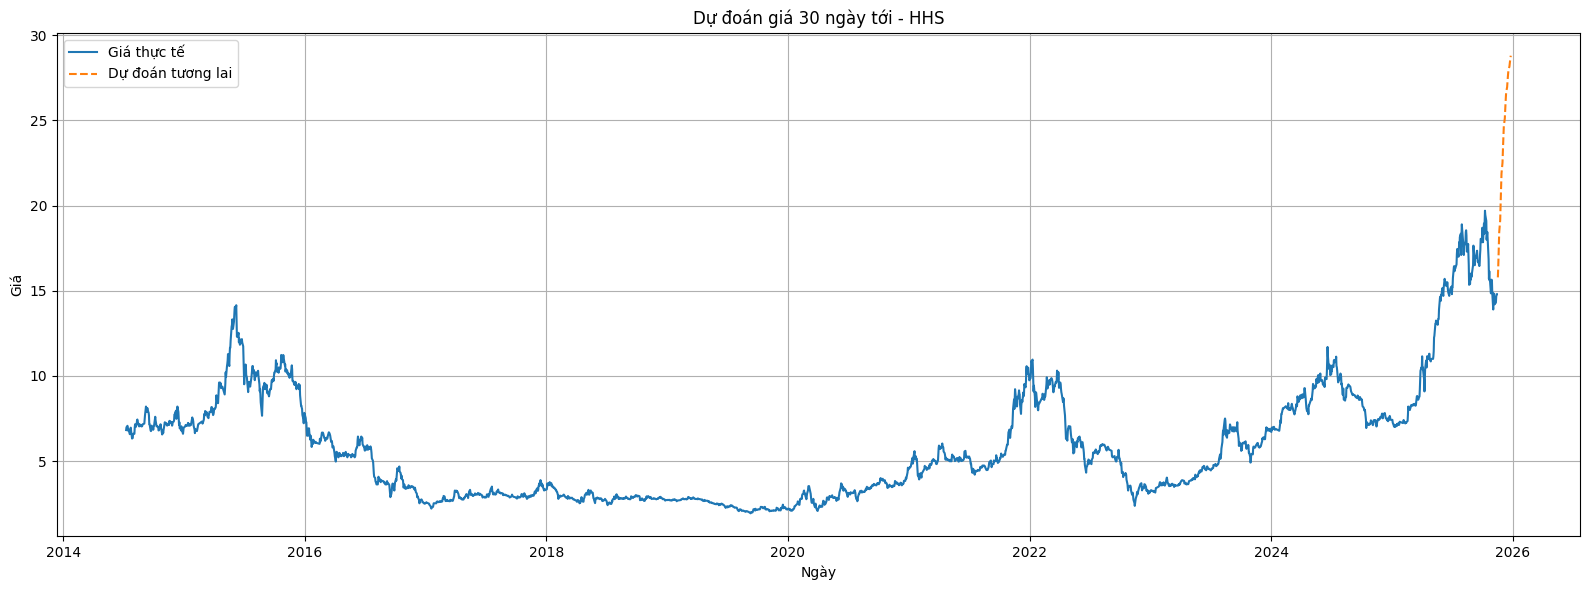

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


VEC - Giá close gần nhất: 43.30
VEC - 30 giá close dự đoán tiếp theo: 14.561893463134766


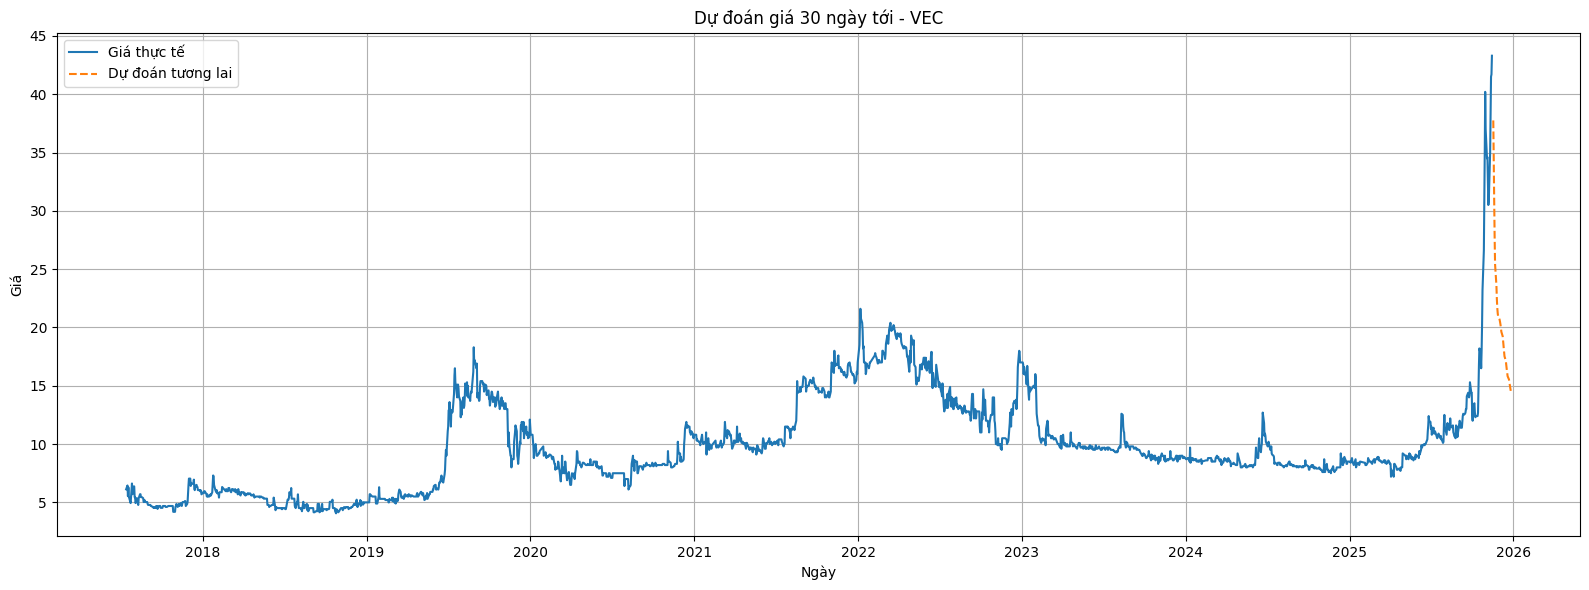

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


DSE - Giá close gần nhất: 25.55
DSE - 30 giá close dự đoán tiếp theo: 23.25041389465332


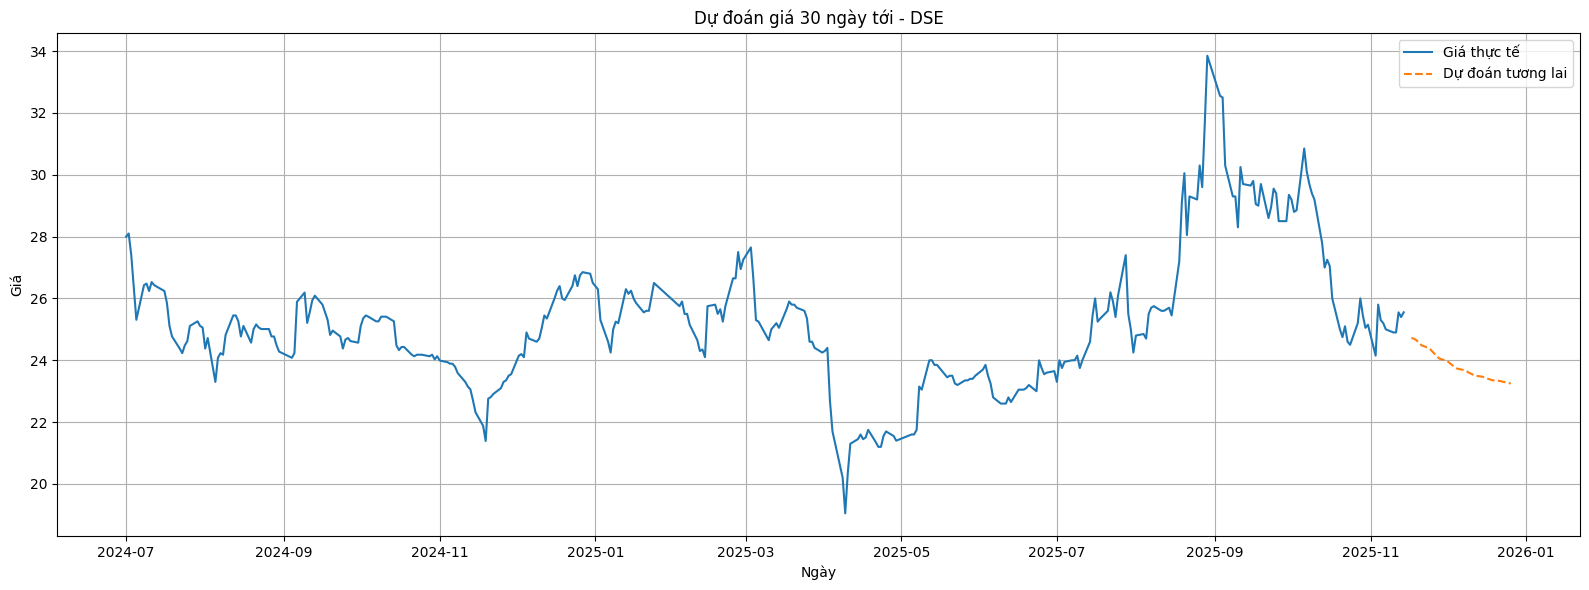

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


BMS - Giá close gần nhất: 12.90
BMS - 30 giá close dự đoán tiếp theo: 10.297398567199707


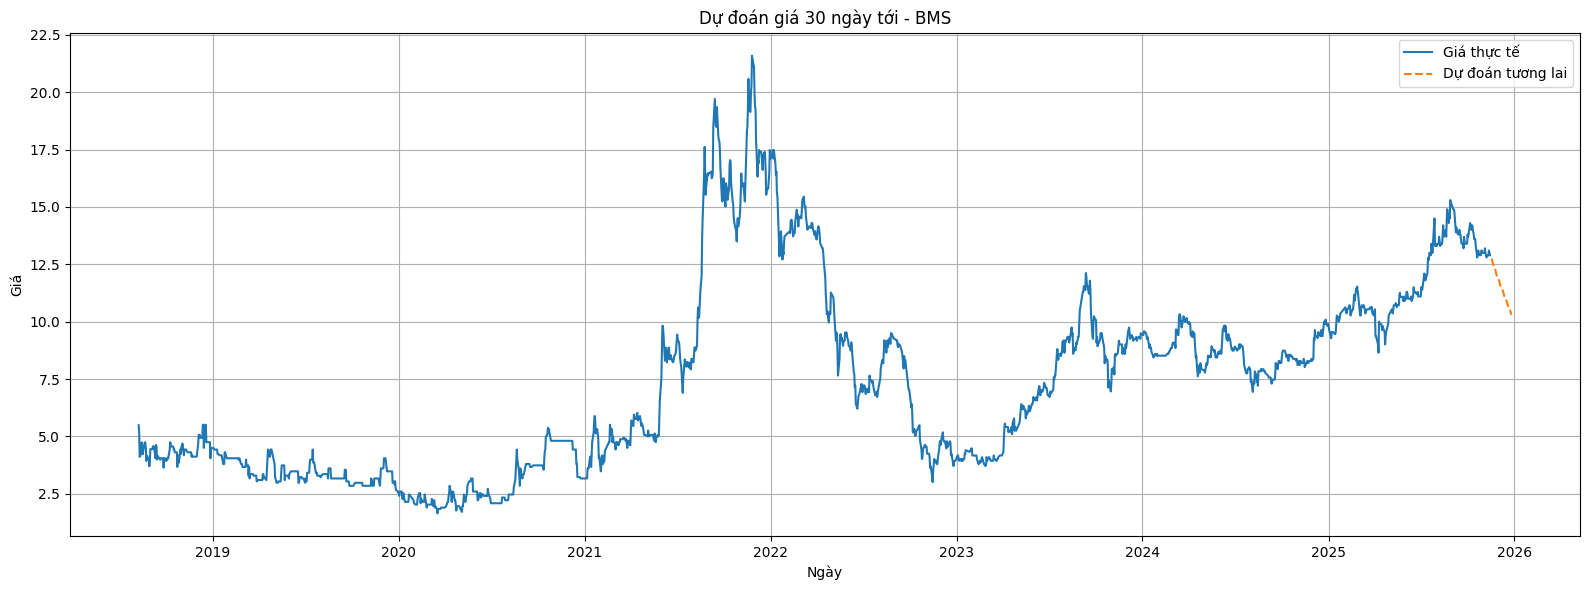

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


ACB - Giá close gần nhất: 24.95
ACB - 30 giá close dự đoán tiếp theo: 22.93330955505371


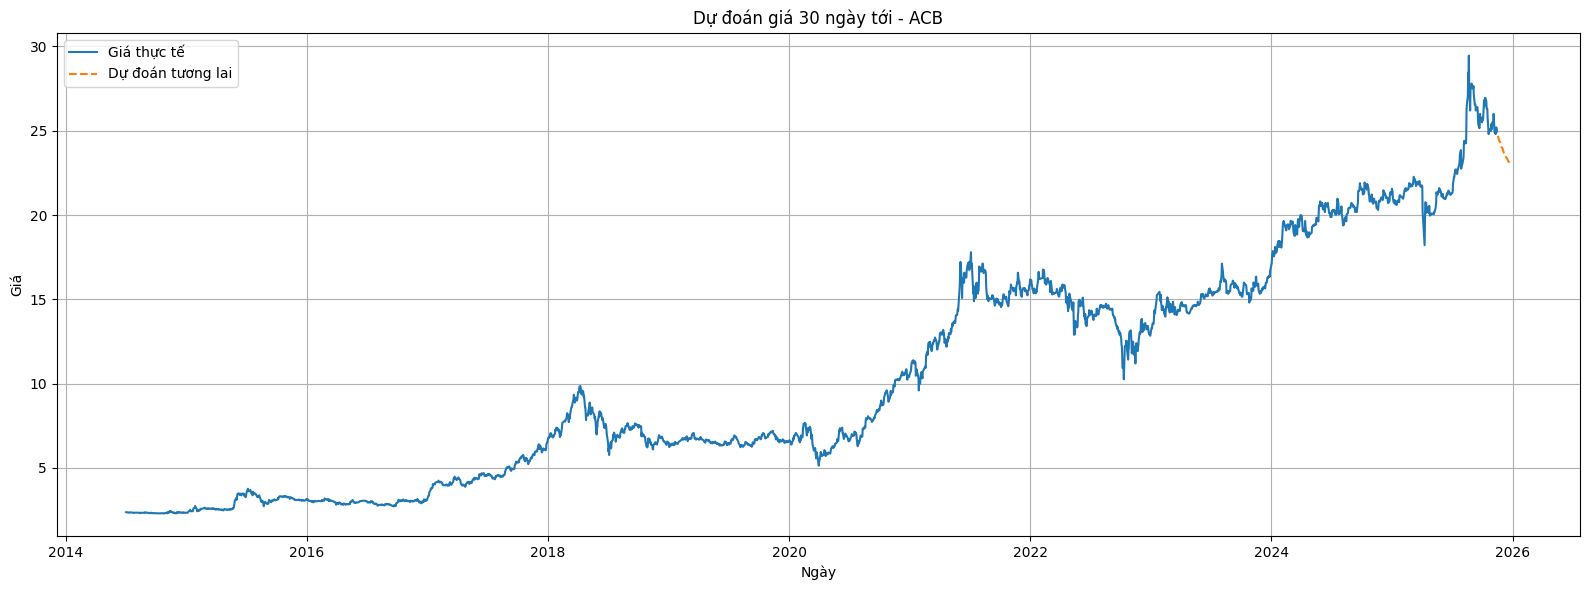

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


VHE - Giá close gần nhất: 4.40
VHE - 30 giá close dự đoán tiếp theo: -10.41227912902832


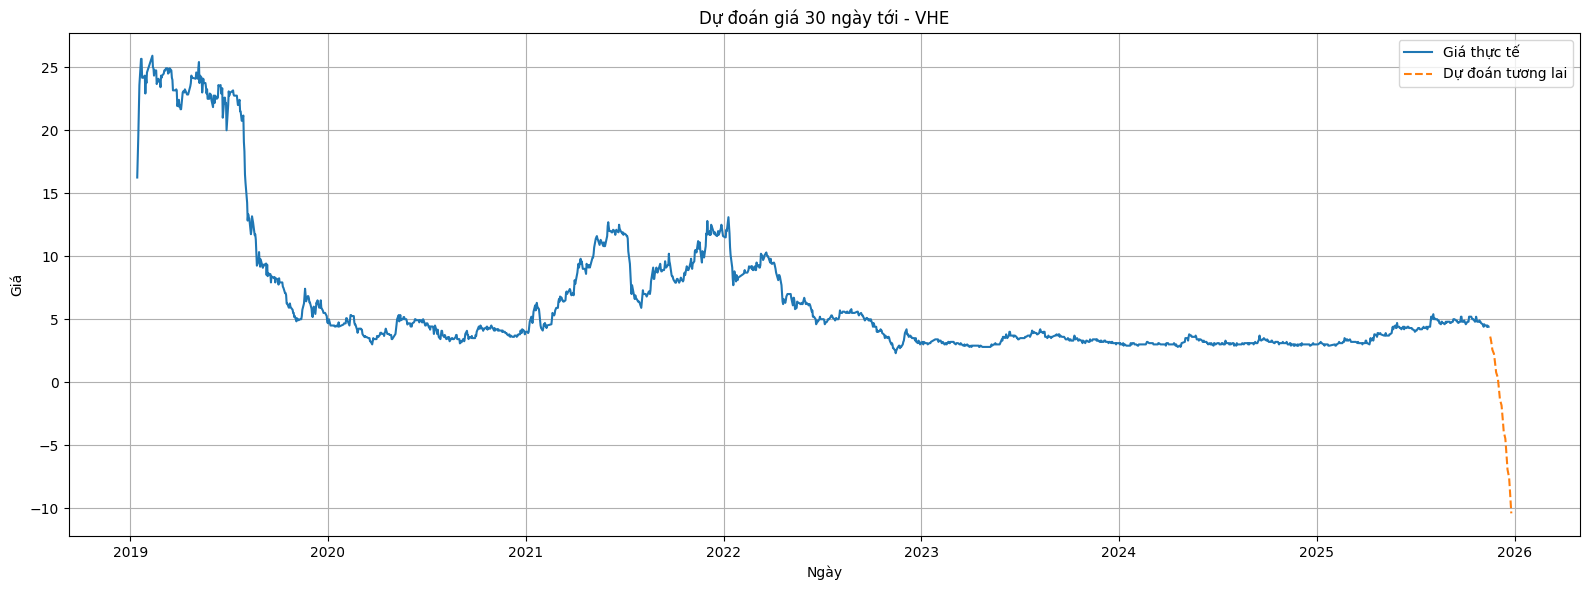

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


JVC - Giá close gần nhất: 7.20
JVC - 30 giá close dự đoán tiếp theo: 30.93315315246582


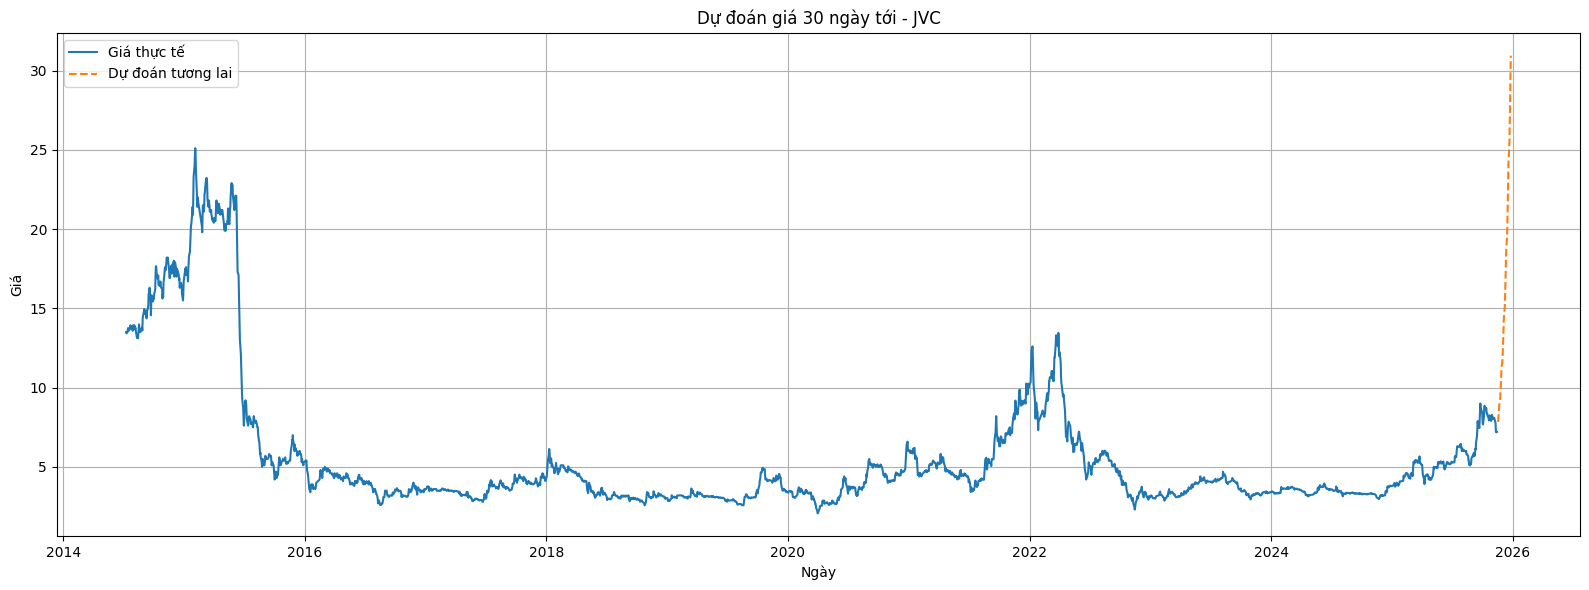

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


MBS - Giá close gần nhất: 30.10
MBS - 30 giá close dự đoán tiếp theo: 21.587448120117188


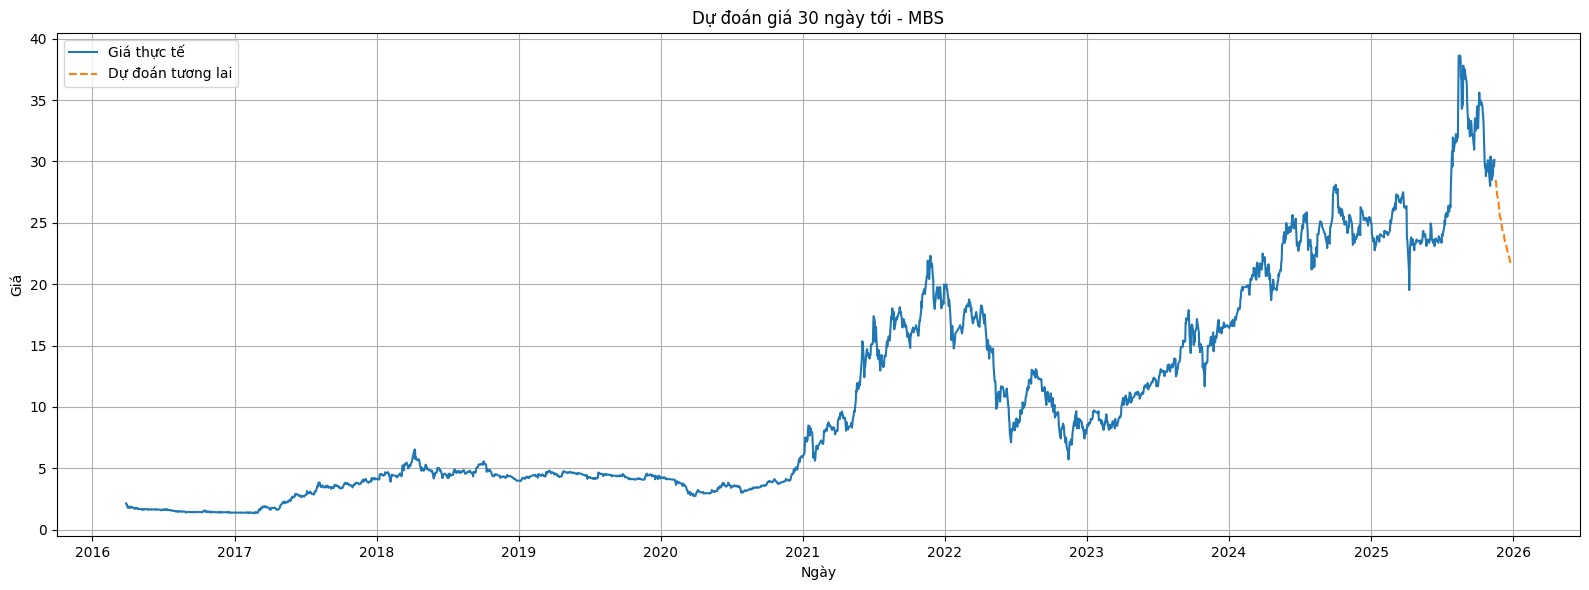

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


AAS - Giá close gần nhất: 8.70
AAS - 30 giá close dự đoán tiếp theo: 9.969135284423828


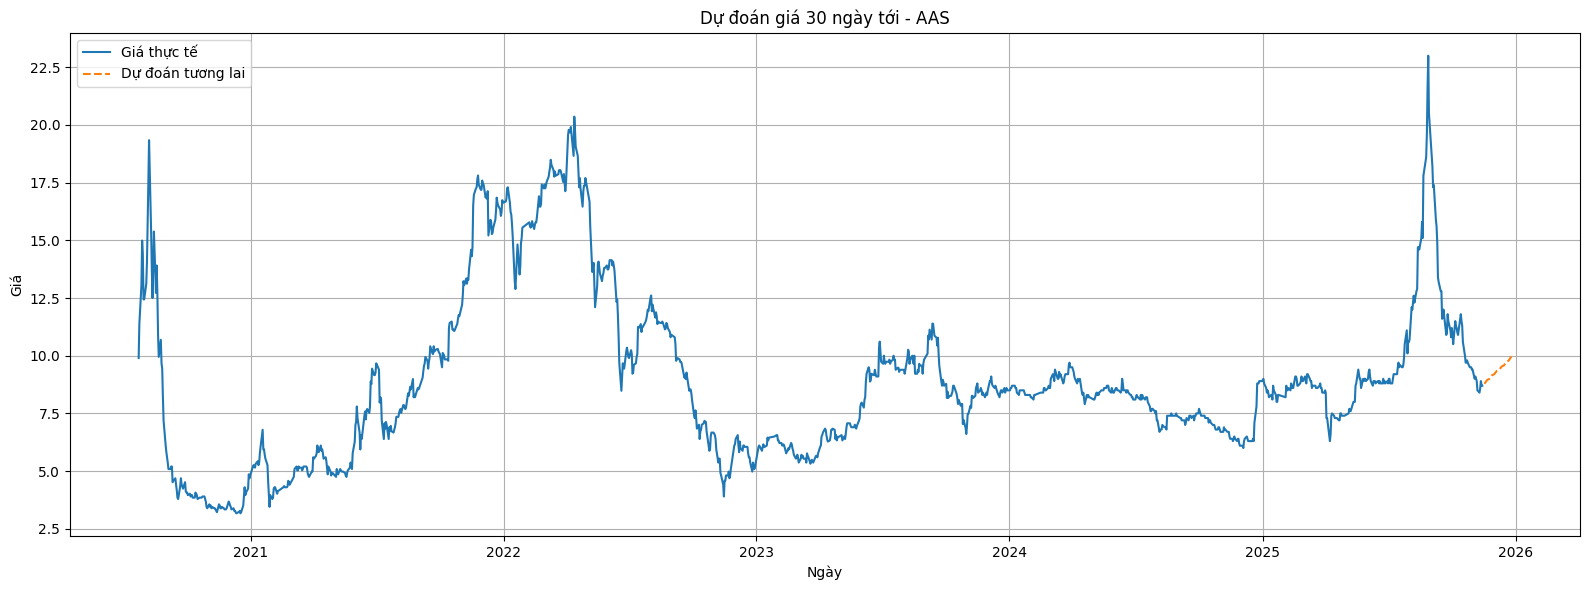

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


IJC - Giá close gần nhất: 12.45
IJC - 30 giá close dự đoán tiếp theo: 6.47517204284668


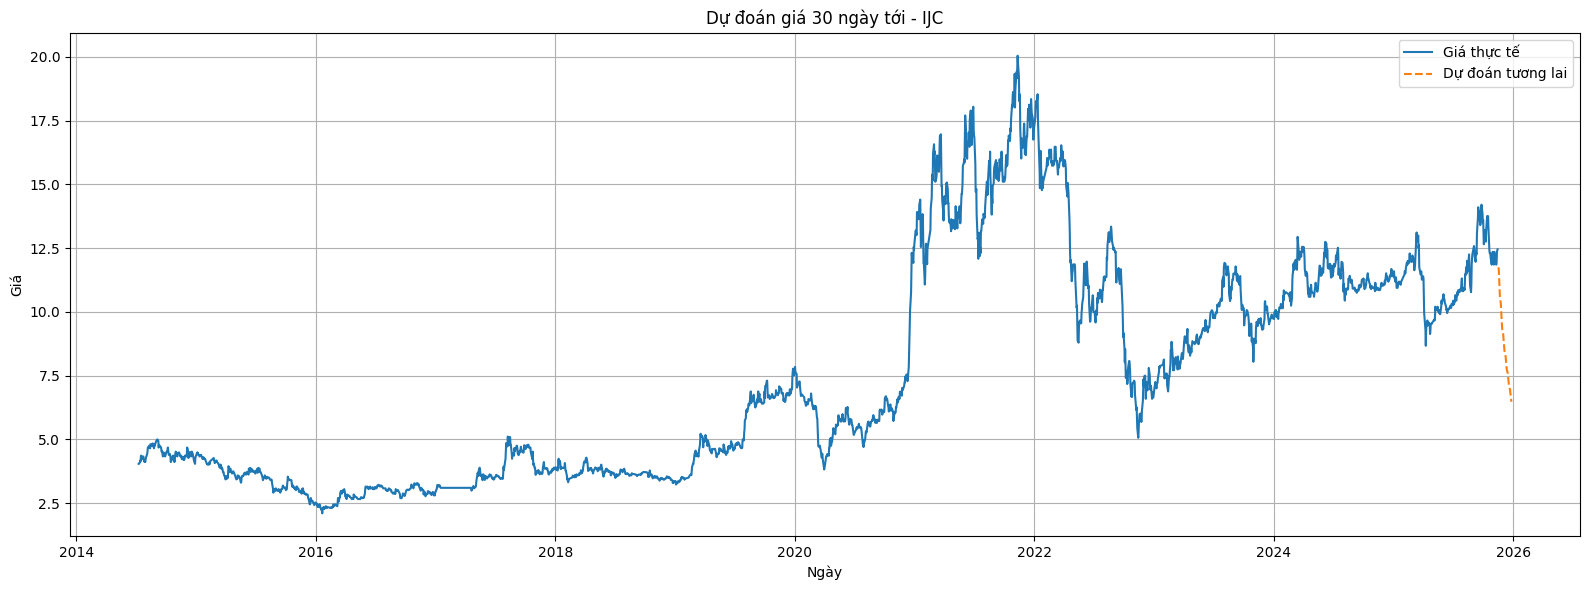

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


TV2 - Giá close gần nhất: 36.00
TV2 - 30 giá close dự đoán tiếp theo: 18.097789764404297


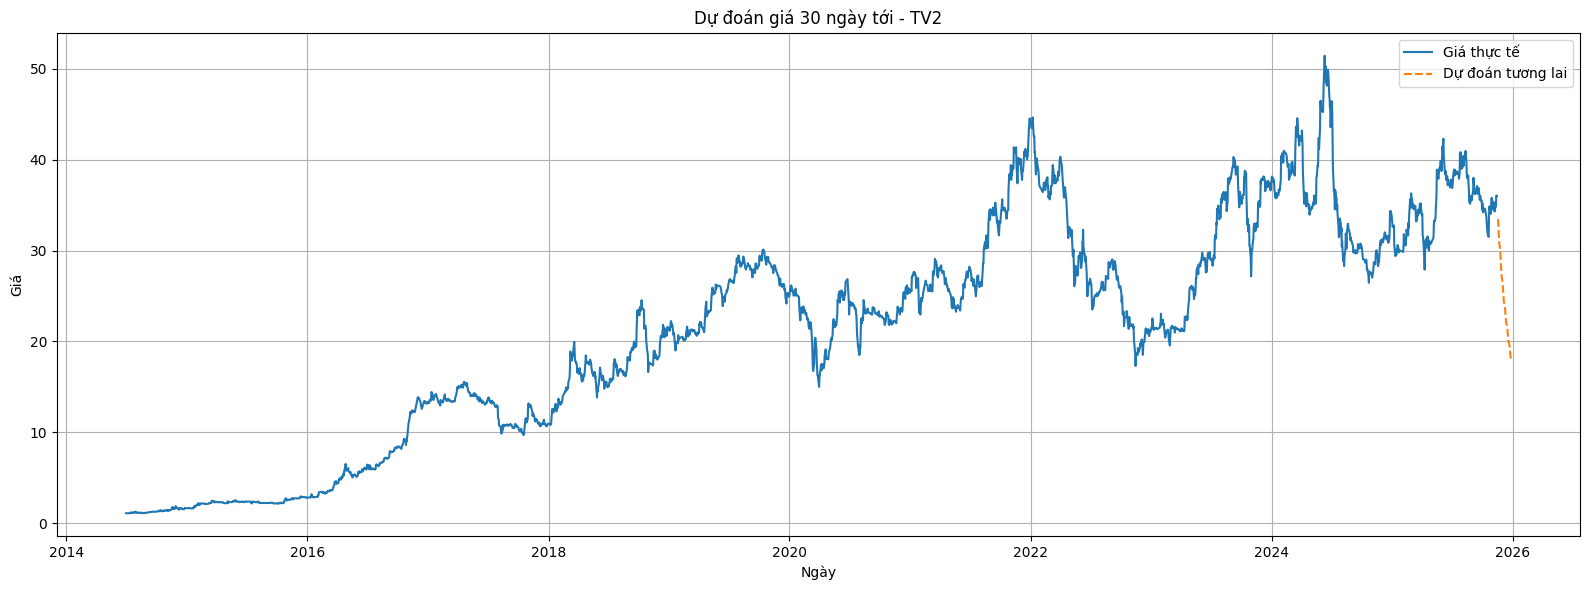

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


CTG - Giá close gần nhất: 48.55
CTG - 30 giá close dự đoán tiếp theo: 64.98710632324219


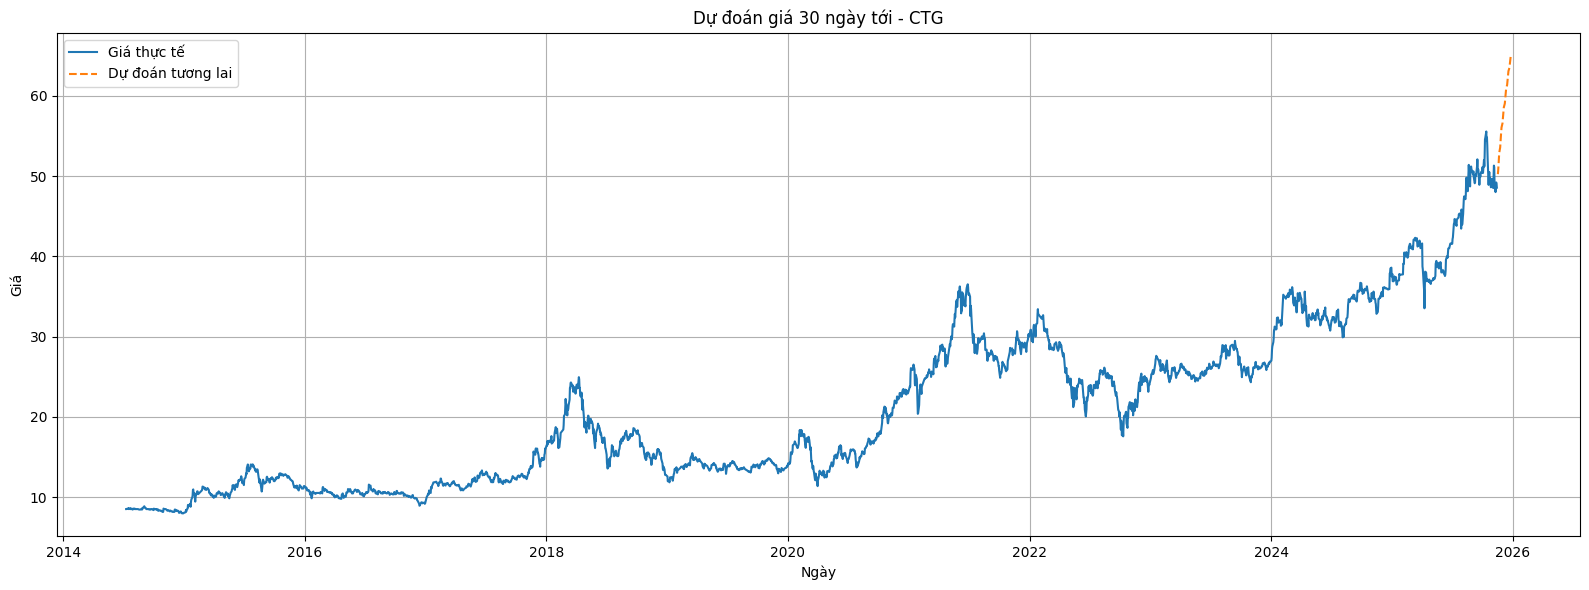

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


VFS - Giá close gần nhất: 16.10
VFS - 30 giá close dự đoán tiếp theo: 11.573012351989746


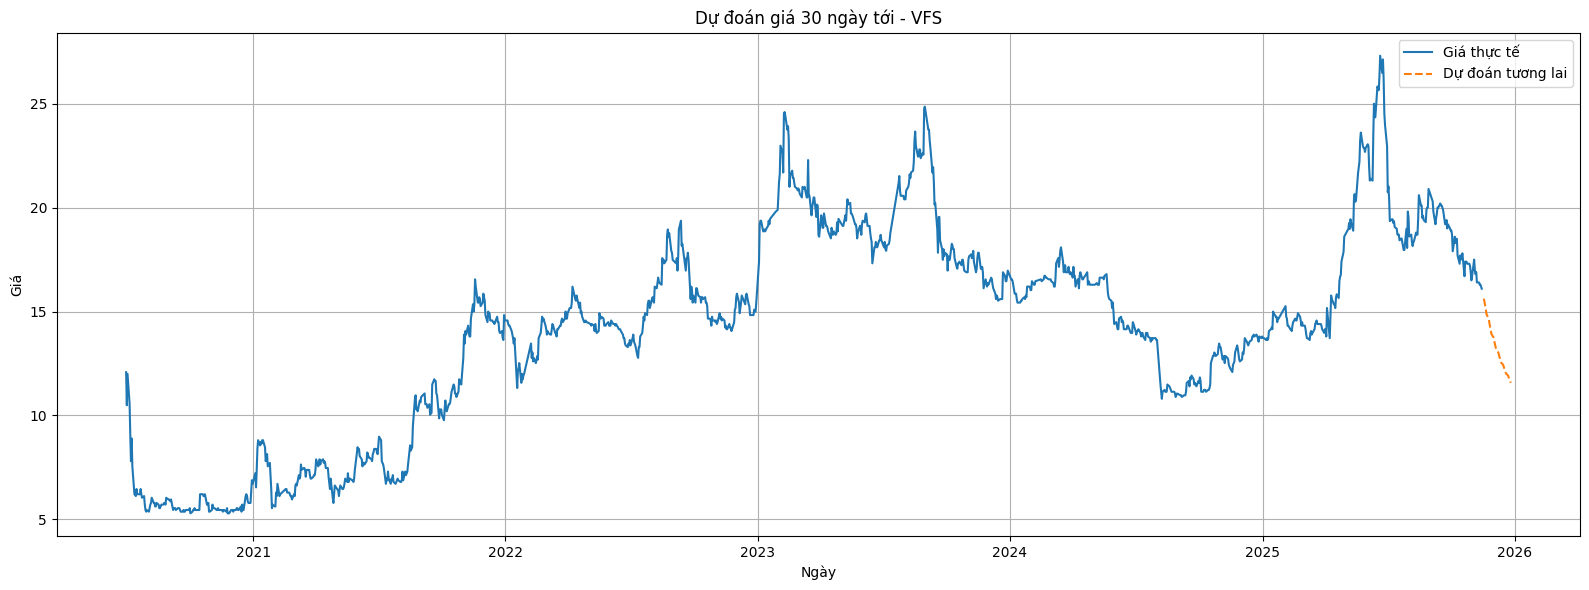

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


EIB - Giá close gần nhất: 21.35
EIB - 30 giá close dự đoán tiếp theo: 26.884029388427734


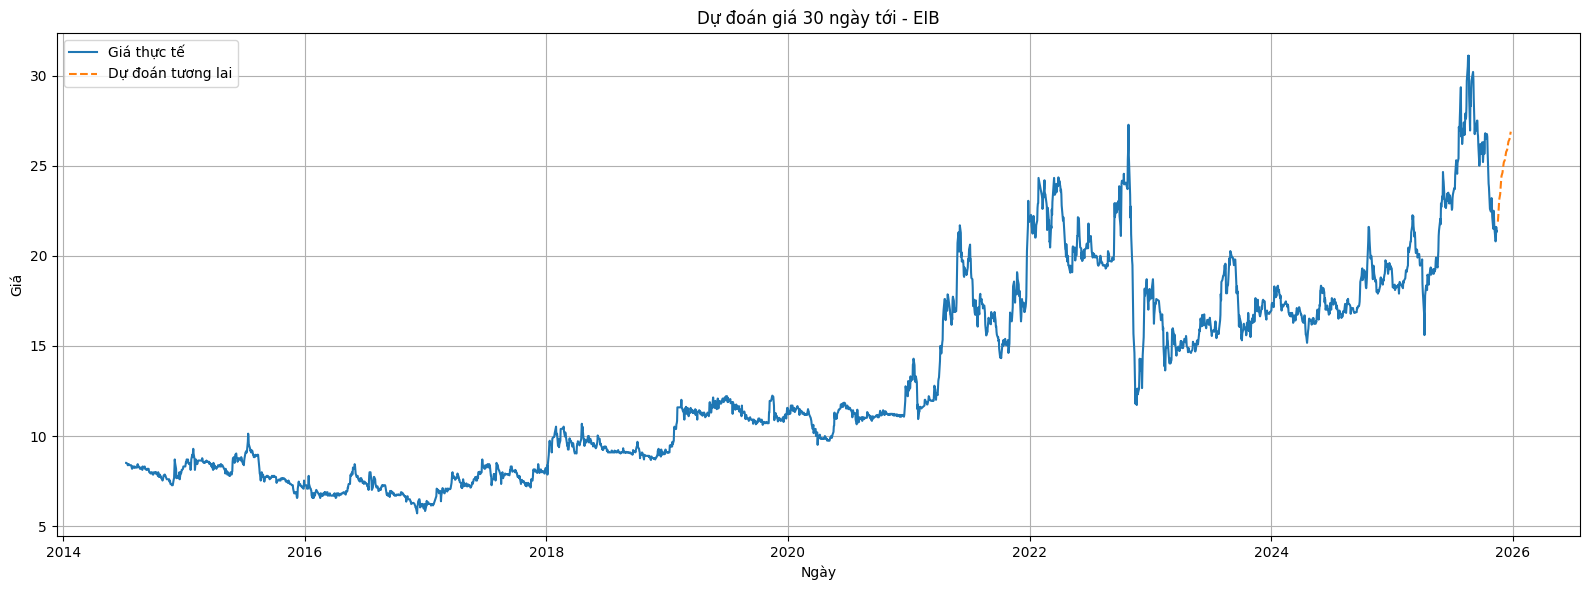

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


BIC - Giá close gần nhất: 23.95
BIC - 30 giá close dự đoán tiếp theo: 18.59039306640625


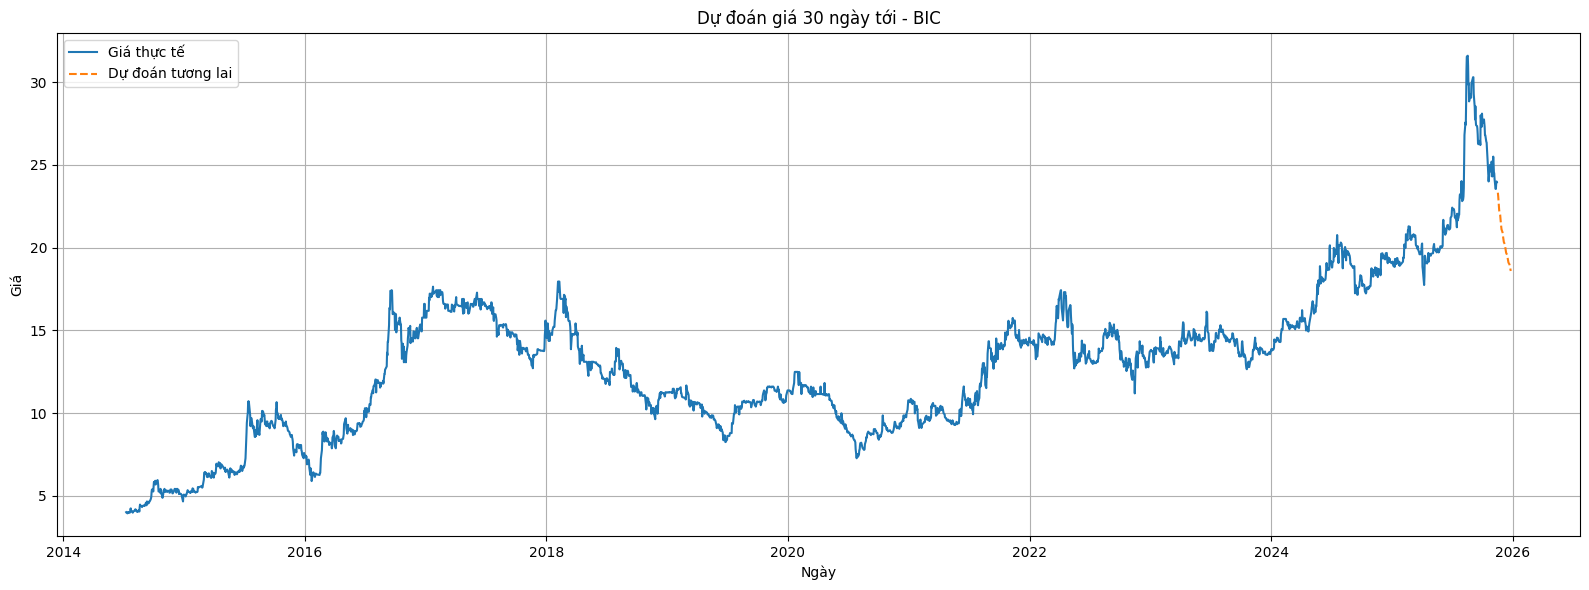

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


HPG - Giá close gần nhất: 26.90
HPG - 30 giá close dự đoán tiếp theo: 15.364481925964355


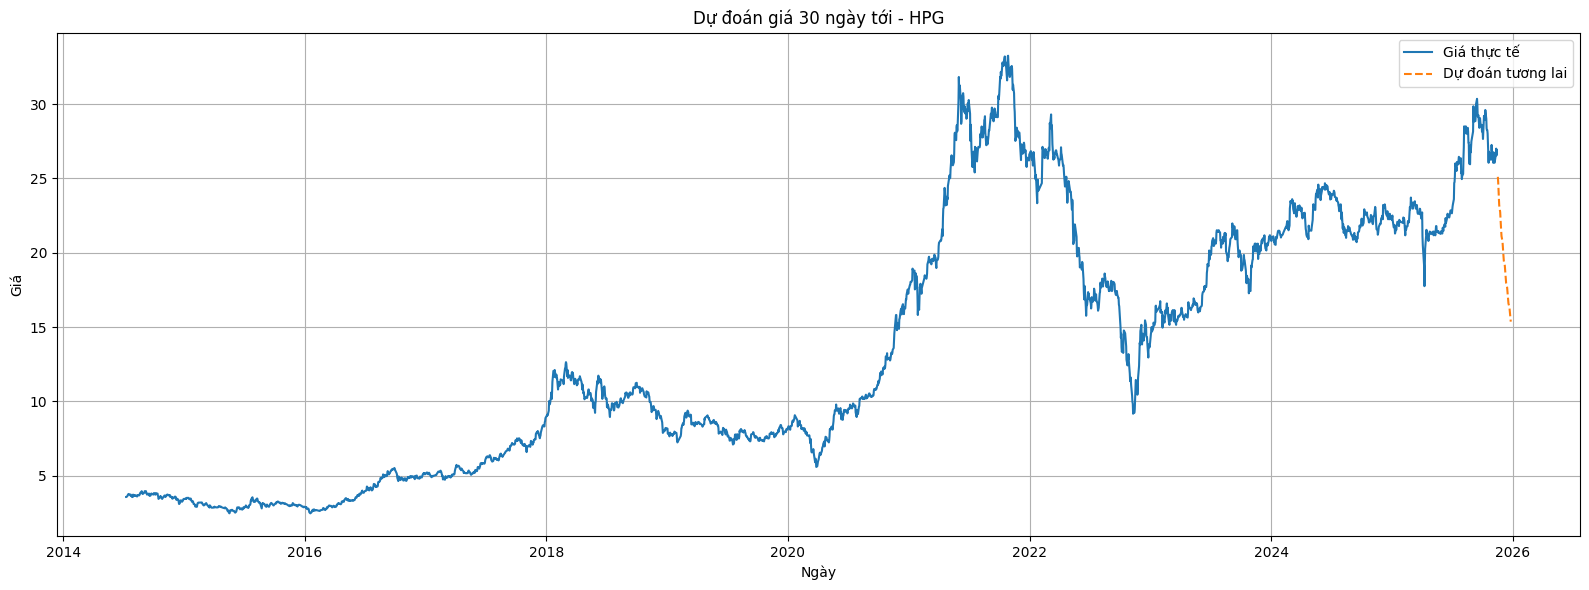

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


TCH - Giá close gần nhất: 21.30
TCH - 30 giá close dự đoán tiếp theo: 53.63465881347656


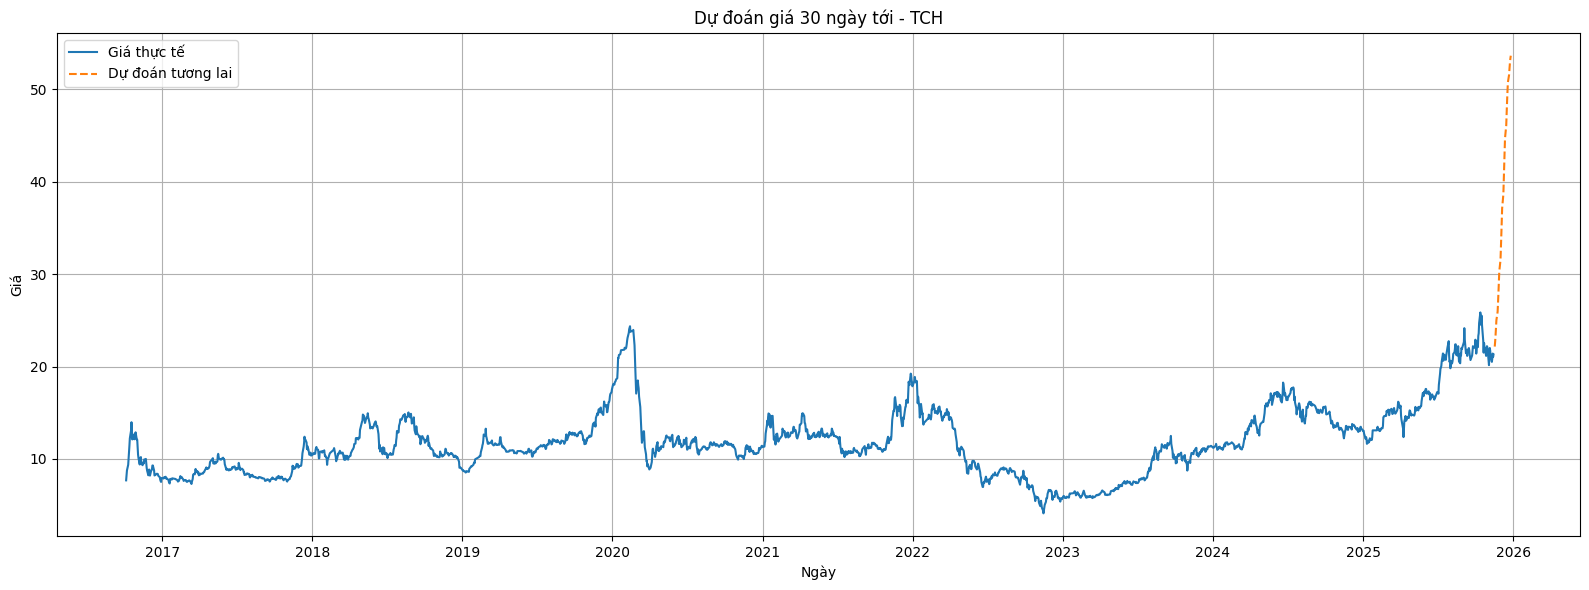

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


DPM - Giá close gần nhất: 23.85
DPM - 30 giá close dự đoán tiếp theo: 24.16216278076172


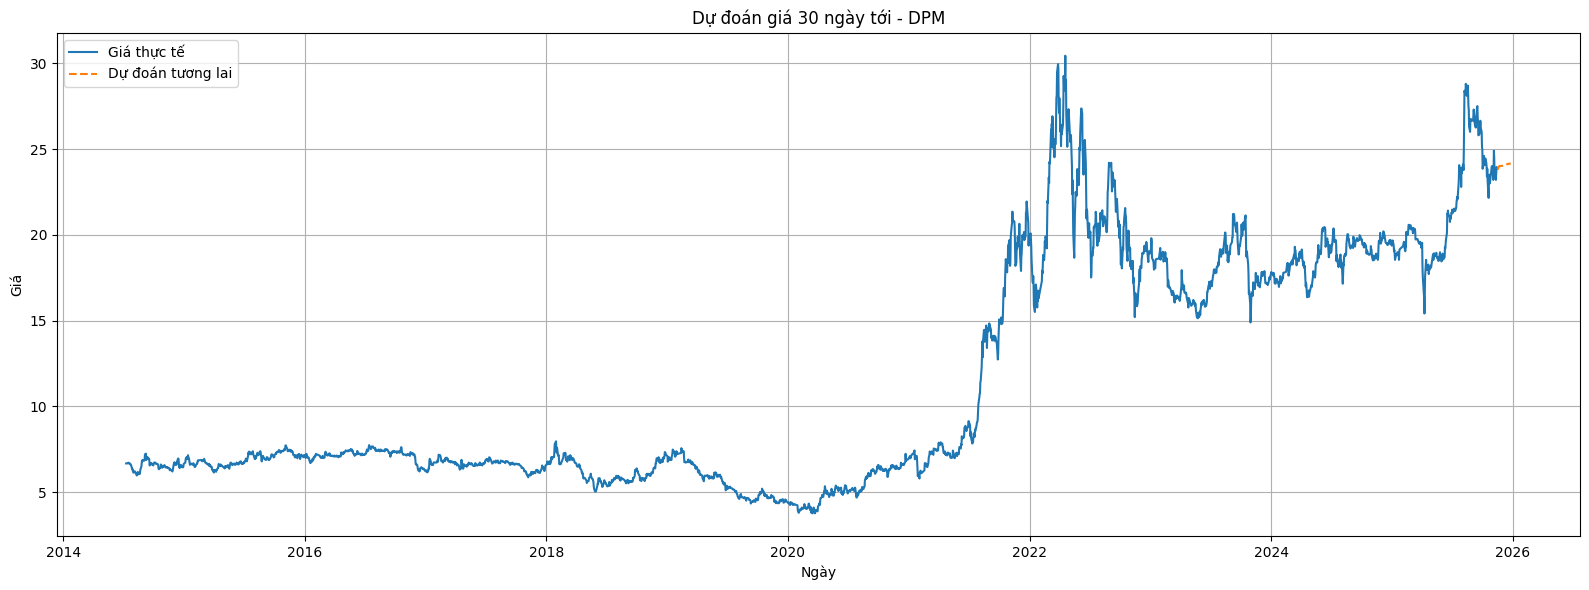

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


DL1 - Giá close gần nhất: 5.50
DL1 - 30 giá close dự đoán tiếp theo: 5.149508476257324


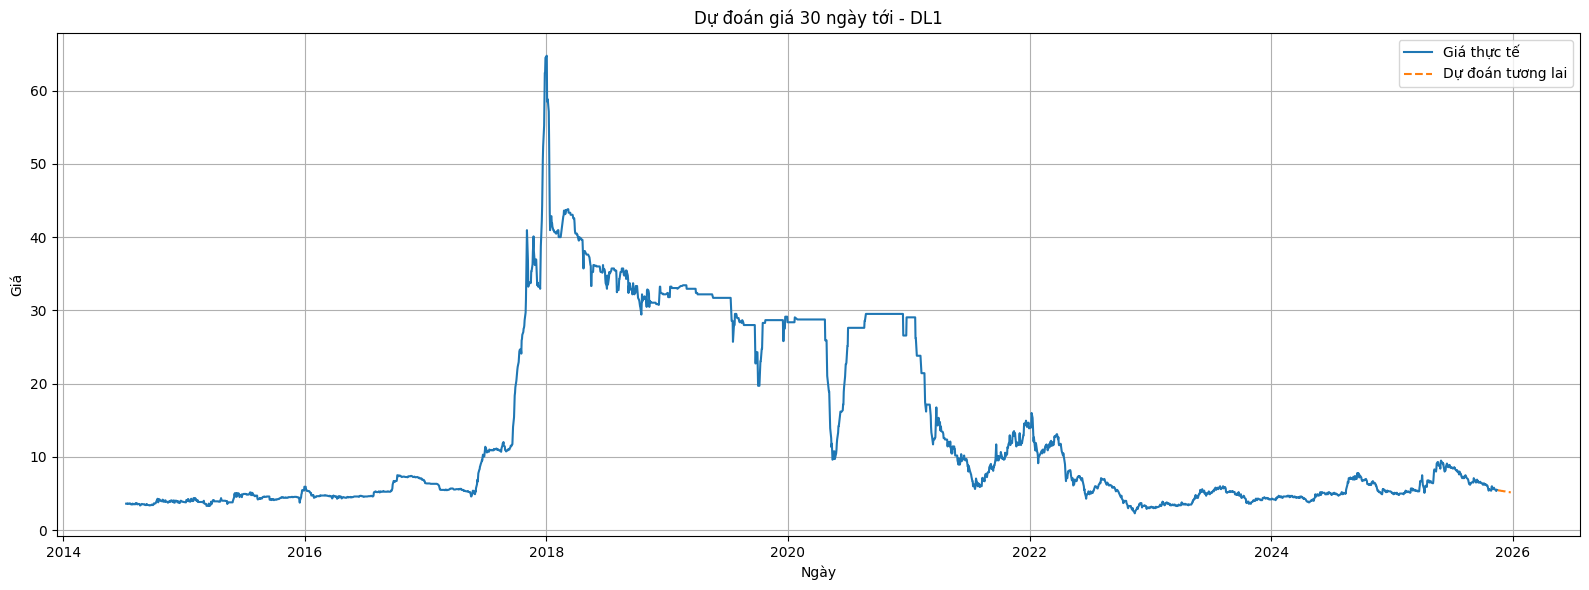

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


MSR - Giá close gần nhất: 23.50
MSR - 30 giá close dự đoán tiếp theo: 29.83283233642578


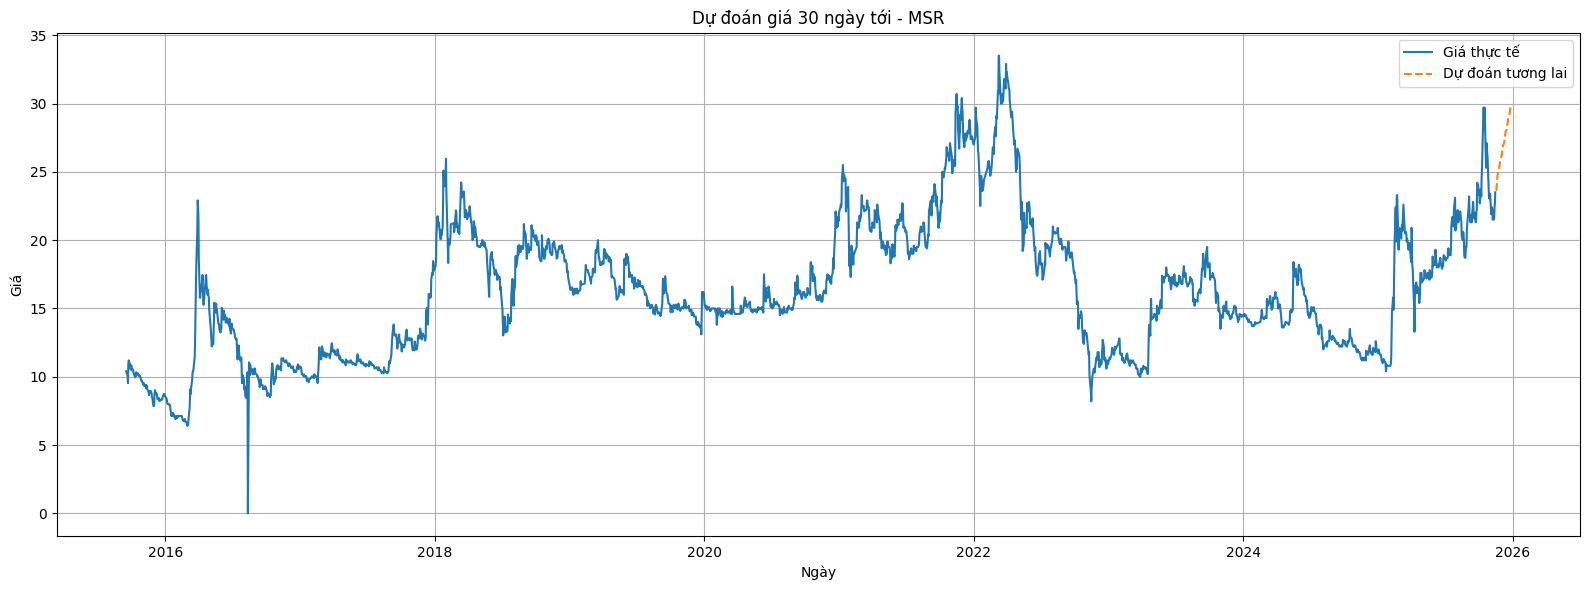

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


PAN - Giá close gần nhất: 28.75
PAN - 30 giá close dự đoán tiếp theo: 39.085426330566406


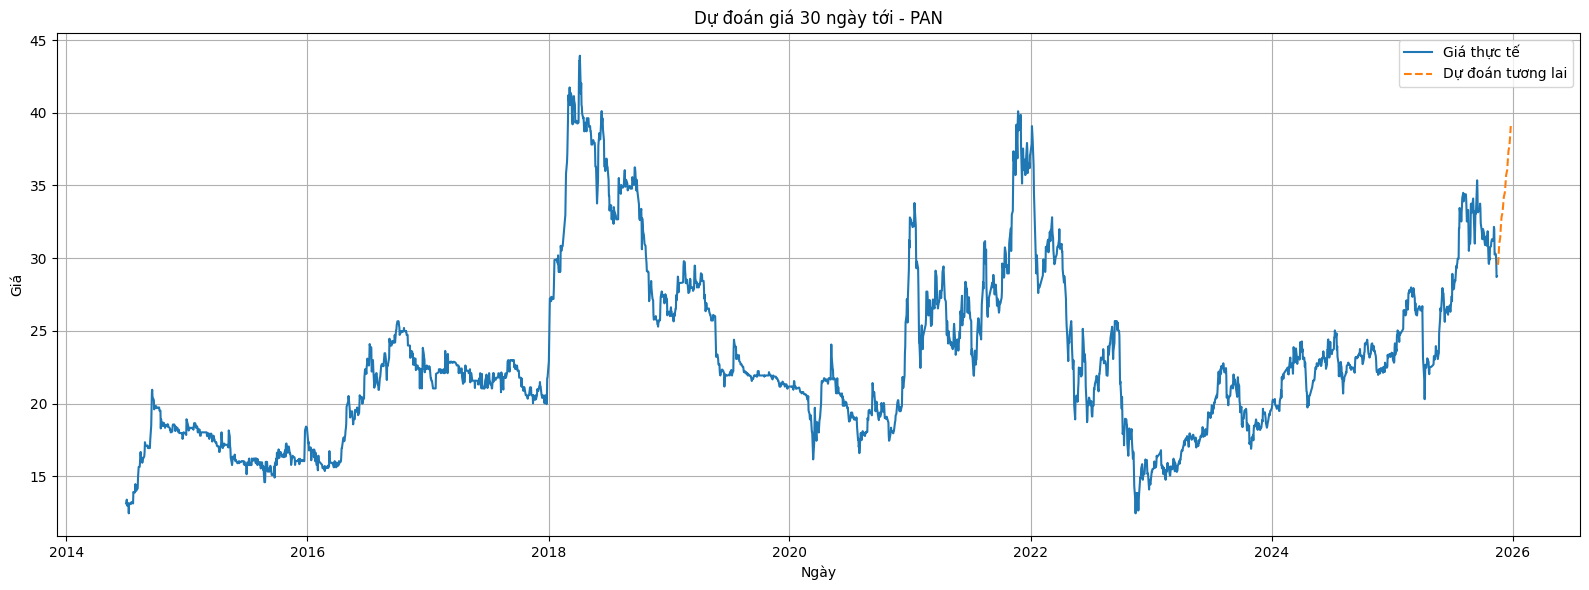

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


BFC - Giá close gần nhất: 46.00
BFC - 30 giá close dự đoán tiếp theo: 19.79168701171875


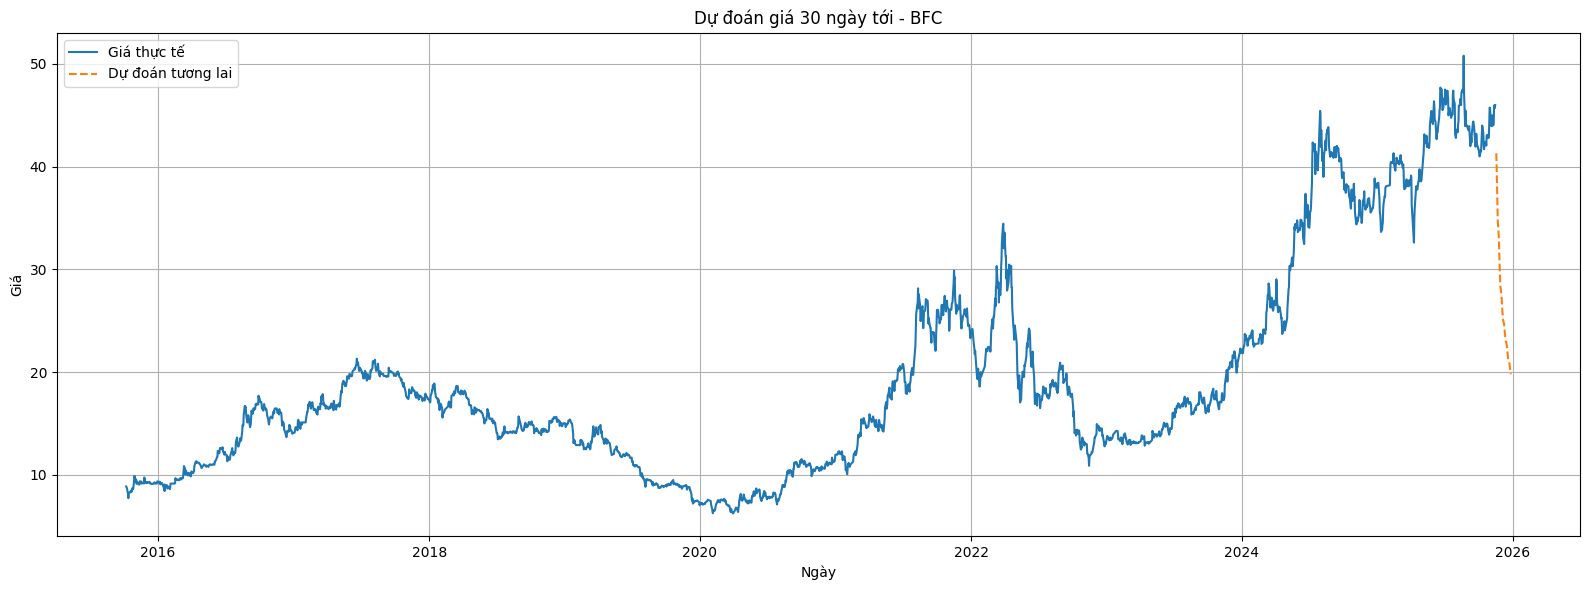

✅ Đã lưu PNG + JSON


C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\3054833183.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}


In [8]:
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from datetime import datetime

# ⭐ chỉ thêm: tạo thư mục charts và data json
os.makedirs("charts", exist_ok=True)

result_json = {}

for t, ticker in enumerate(all_tickers):
    model_path = f"models1/{ticker}_lstm_model.h5"
    model = load_model(model_path)

    filePath = f"data_vnstock/{ticker}.csv"
    df = pd.read_csv(filePath, parse_dates=['time'], index_col='time')
    df = df[['close']].copy()
    df.dropna(inplace=True)

    training_data_len = int(len(df) * 0.95)
    train_data = df[['close']].values[:training_data_len]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(train_data)

    scaled_data = scaler.transform(df[['close']].values)
    last_30 = scaled_data[-30:]

    predicted = []
    current_input = last_30.copy()

    for _ in range(30):
        input_seq = current_input.reshape(1, 30, 1)
        next_pred = model.predict(input_seq, verbose=0)[0][0]
        predicted.append(next_pred)
        current_input = np.append(current_input[1:], [[next_pred]], axis=0)

    predicted_prices = scaler.inverse_transform(np.array(predicted).reshape(-1, 1))

    last_close_price = df['close'].iloc[-1]
    print(f"{ticker} - Giá close gần nhất: {last_close_price:.2f}")
    print(f"{ticker} - 30 giá close dự đoán tiếp theo: {predicted_prices.flatten()[-1]}")

    last_date = df.index[-1]
    future_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=30)

    df_future = pd.DataFrame({'Predicted_Close': predicted_prices.flatten()}, index=future_dates)

    plt.figure(figsize=(16, 6))
    plt.title(f'Dự đoán giá 30 ngày tới - {ticker}')
    plt.plot(df.index, df['close'], label='Giá thực tế') 
    plt.plot(df_future.index, df_future['Predicted_Close'],
         '--', label='Dự đoán tương lai')    
    plt.xlabel('Ngày')
    plt.ylabel('Giá')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # ⭐ THÊM: lưu file PNG
    img_name = f"{ticker}_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    img_path = f"charts/{img_name}"
    plt.savefig(img_path)

    plt.show()  # ❗ giữ nguyên

    # ⭐ THÊM: lưu vào JSON
    result_json[ticker] = {
        "predicted_on": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "last_close_price": float(last_close_price),
        "chart_path": img_path,
        "future": [
            {"date": str(future_dates[i].date()), "predicted_close": float(predicted_prices[i])}
            for i in range(30)
        ]
    }

# ⭐ THÊM: lưu file json
with open("predict_top50_stocks.json", "w", encoding="utf-8") as f:
    json.dump(result_json, f, indent=4, ensure_ascii=False)

print("✅ Đã lưu PNG + JSON")
